In [15]:
#import os pacotes utilizados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set()
import prince

%matplotlib inline

import geocoder
import folium
from folium.plugins import HeatMap
from folium import plugins

import scipy.stats as stats
from sklearn.cluster import KMeans

import os
import json
from branca.colormap import linear
from numpy import random

In [2]:
dados_tunning = pd.read_json('dados/dados_workflow_ivan.json')

dados_tunning.head(2)

,LnguaPortuguesaeLiteraturaI90H,LnguaPortuguesaeLiteraturaI90H_dependencia,LnguaPortuguesaeLiteraturaI90H_freq,MatemticaI120H,MatemticaI120H_dependencia,MatemticaI120H_freq,acompanhamento,aluno_exclusivo_rede_publica,artificial,classe,...,descricao_trabalho,id,idade,pessoa_fisica__sexo,possui_necessidade_especial,qnt_pc,qnt_salarios,qtd_pessoas_domicilio,sigla,tempo_entre_conclusao_ingresso
0,68.0,0,100.0,66.0,0,100.0,0,False,0,1,...,Não informado,457884597605,15,F,False,0,1,2,LAJ,1
1,73.0,1,100.0,36.0,1,91.0,0,False,1,0,...,Não informado,458436647741,17,M,False,1,1,2,SPP,2


In [3]:
dados = dados_tunning.copy()
dados.shape

(8908, 33)

# Análise de nota e evasão

(22.517867818792507, 61.4181339248579, 0.954059992354295)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


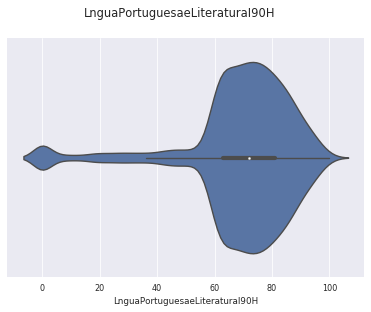

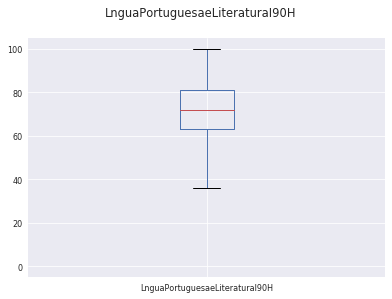

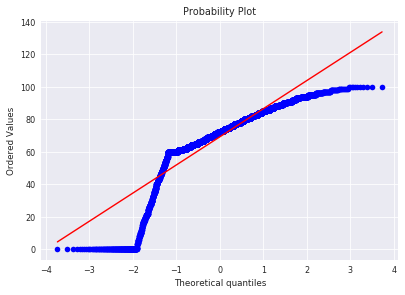

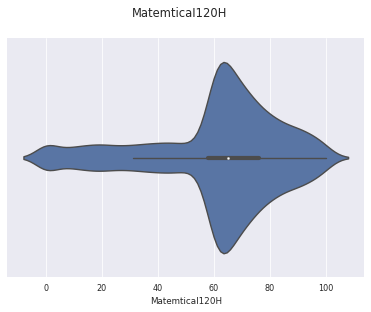

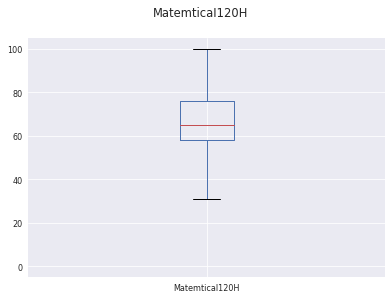

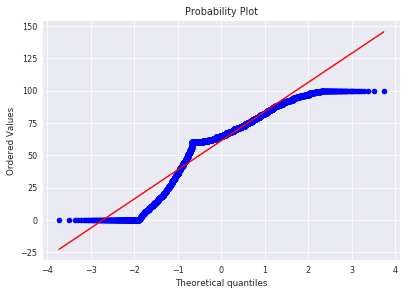

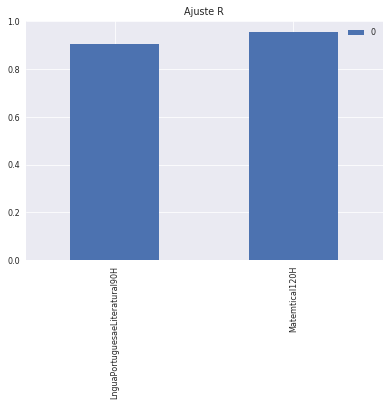

In [13]:
#gerando graficos
%matplotlib inline
sns.set_context("paper")

plt.close('all')

#array para guardar o R o qual representa o erro do ajuste com a Normal. Quanto mais próximo de 1, mais próximo está da normal
r = []
i = []

fig = plt.figure()
sns.plt.suptitle('LnguaPortuguesaeLiteraturaI90H')
#sns.violinplot(dados[dados.descricao_historico == index1]['media_final'], inner="points")
#sns.violinplot(dados[dados.descricao_historico == index1]['media_final'], inner="quart")
sns.violinplot(dados['LnguaPortuguesaeLiteraturaI90H'].dropna())
#fig.savefig("violino1.pdf", dpi=600)

fig = plt.figure()
sns.plt.suptitle('LnguaPortuguesaeLiteraturaI90H')
dados['LnguaPortuguesaeLiteraturaI90H'].dropna().plot(kind='box')
#fig.savefig("boxplot.pdf", dpi=600)

fig = plt.figure()
o, res = stats.probplot(dados['LnguaPortuguesaeLiteraturaI90H'].dropna(), plot=plt)    

r.append(res[2])
i.append('LnguaPortuguesaeLiteraturaI90H')

#matematica
fig = plt.figure()
sns.plt.suptitle('MatemticaI120H')
sns.violinplot(dados['MatemticaI120H'].dropna())
#fig.savefig("violino1.pdf", dpi=600)

fig = plt.figure()
sns.plt.suptitle('MatemticaI120H')
dados['MatemticaI120H'].dropna().plot(kind='box')
#fig.savefig("boxplot.pdf", dpi=600)

fig = plt.figure()
o, res = stats.probplot(dados['MatemticaI120H'].dropna(), plot=plt)    

r.append(res[2])
i.append('MatemticaI120H')

df = pd.DataFrame(data=r, index=i)

print(res)

fig = plt.figure()
df.plot.bar(title='Ajuste R')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


(7211,)
(7211,)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


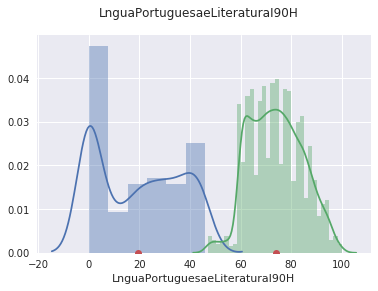

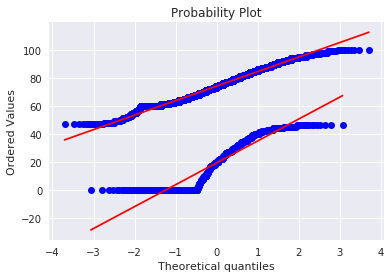

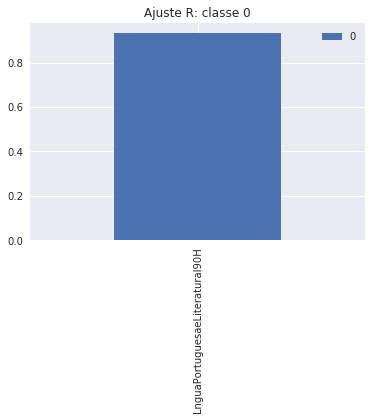

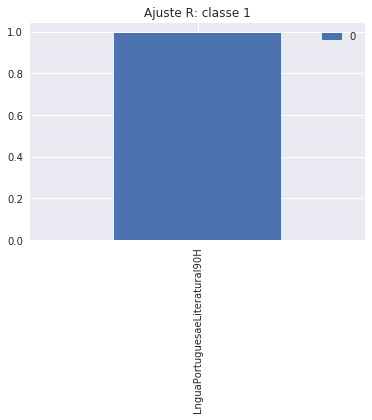

In [32]:
plt.close('all')

r1 = []
r2 = []
i = []

dados = dados_tunning.copy()
dados = dados[['LnguaPortuguesaeLiteraturaI90H', 'MatemticaI120H']]
dados = dados.dropna()

dados['classe_kmeans_port'] = np.ones(dados.shape[0])*-1
dados['classe_kmeans_mat'] = np.ones(dados.shape[0])*-1

#recuperando os clusters
cluster_port = KMeans(n_clusters=2, init=np.array([[0], [10]]))
cluster_port.fit(dados['LnguaPortuguesaeLiteraturaI90H'].reshape(-1,1))
#print(cluster.cluster_centers_)
cluster_mat = KMeans(n_clusters=2, init=np.array([[0], [10]]))
cluster_mat.fit(dados['MatemticaI120H'].reshape(-1,1))

#atribuindo a classe
dados['classe_kmeans_port'] = cluster_port.predict(dados['LnguaPortuguesaeLiteraturaI90H'].reshape(-1,1))
dados['classe_kmeans_mat'] = cluster_port.predict(dados['MatemticaI120H'].reshape(-1,1))

#figura mostrando a clusterizacao
fig = plt.figure()
sns.plt.suptitle('LnguaPortuguesaeLiteraturaI90H')
sns.distplot( dados[dados.classe_kmeans_port == 0]['LnguaPortuguesaeLiteraturaI90H'] )
sns.distplot( dados[dados.classe_kmeans_port == 1]['LnguaPortuguesaeLiteraturaI90H'] )
plt.plot(cluster_port.cluster_centers_, [0, 0], "o")
#fig.savefig("kmeans.pdf", dpi=600)
#figura mostrando a clusterizacao

fig = plt.figure()
sns.plt.suptitle('MatemticaI120H')
sns.distplot( dados[dados.classe_kmeans_mat == 0]['MatemticaI120H'] )
sns.distplot( dados[dados.classe_kmeans_mat == 1]['MatemticaI120H'] )
plt.plot(classe_kmeans_mat.cluster_centers_, [0, 0], "o")

#figura mostrando o ajuste dos dados aos clusters
fig = plt.figure()

o, res1 = stats.probplot(dados[dados.classe_kmeans_port == 0]['LnguaPortuguesaeLiteraturaI90H'], plot=plt)
o, res2 = stats.probplot(dados[dados.classe_kmeans_port == 1]['LnguaPortuguesaeLiteraturaI90H'], plot=plt)

#fig.savefig("qq2.pdf", dpi=600)

r1.append(res1[2])
r2.append(res2[2])
i.append('LnguaPortuguesaeLiteraturaI90H')

df = pd.DataFrame(data=r1, index=i)
fig = plt.figure()
df.plot.bar(title='Ajuste R: classe 0')

df = pd.DataFrame(data=r2, index=i)
fig = plt.figure()
df.plot.bar(title='Ajuste R: classe 1')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


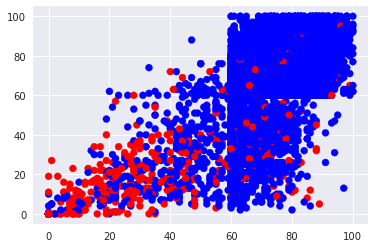

In [5]:
dados = dados_tunning.copy()

#plot eixo y media do primeiro ano, eixo x media do segundo. cores representando evasao ou nao
colors = ['red','blue']
plt.scatter(dados.loc[:, 'LnguaPortuguesaeLiteraturaI90H'], 
            dados.loc[:, 'MatemticaI120H'], 
            c=dados['classe'], 
            cmap=matplotlib.colors.ListedColormap(colors))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


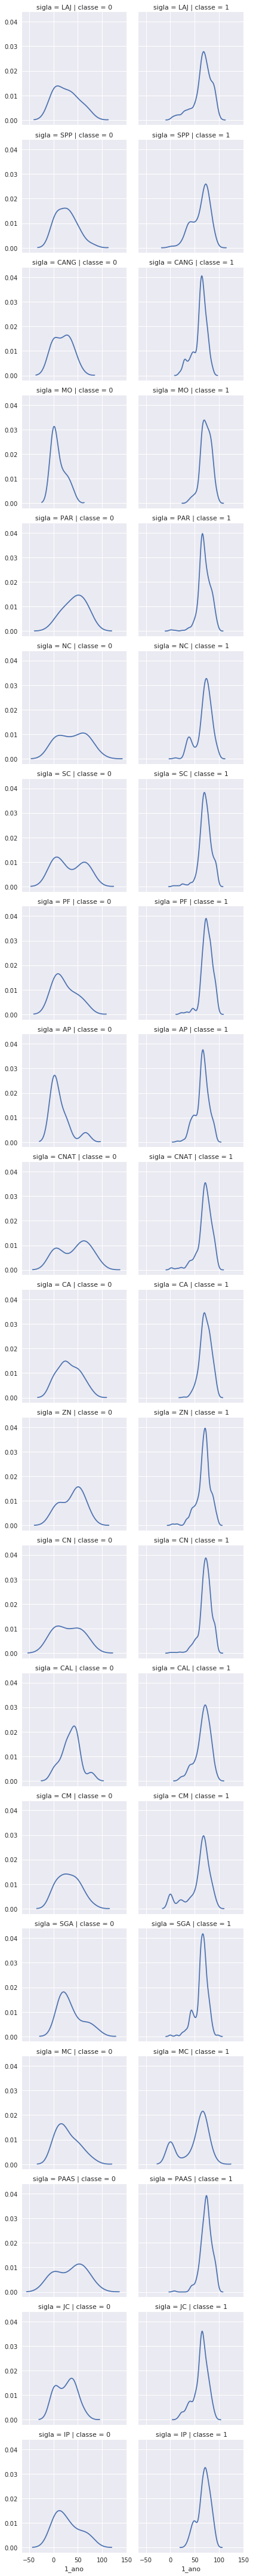

In [8]:
#TODO DA PARA FAZER UMA ANÁLISE EM RELAÇÃO AO QQ-PLOT

nota_1 = dados[['LnguaPortuguesaeLiteraturaI90H', 'MatemticaI120H']].mean(axis=1)
dados['1_ano'] = nota_1

g = sns.FacetGrid(dados, col="classe",  row="sigla")
g = g.map(sns.kdeplot, "1_ano")

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


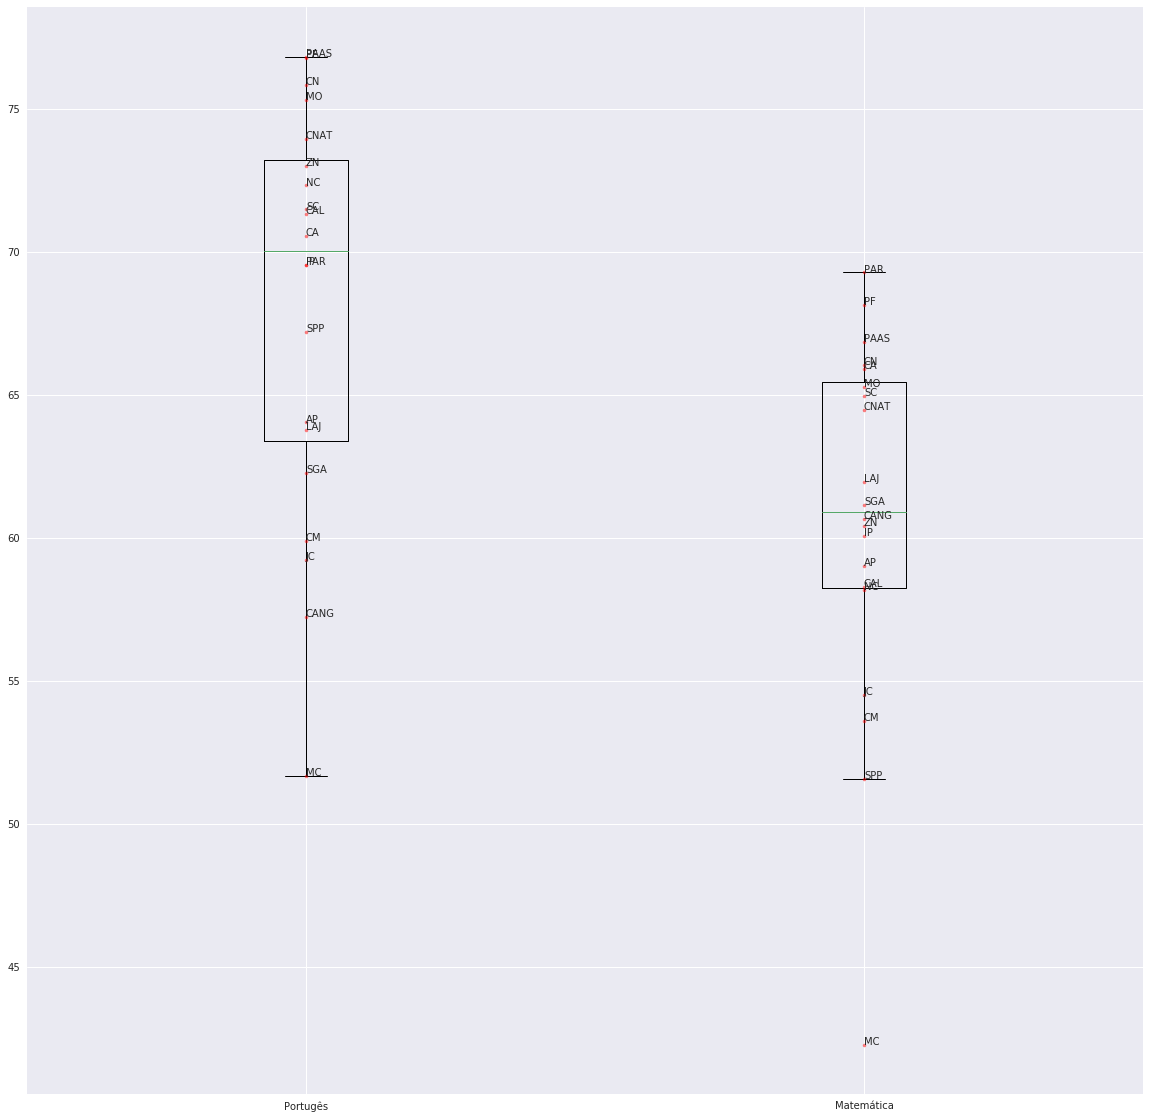

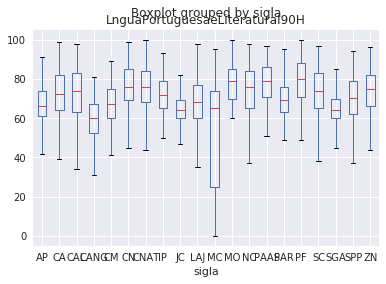

In [11]:
data_plot = [dados.groupby('sigla')['LnguaPortuguesaeLiteraturaI90H'].mean(), dados.groupby('sigla')['MatemticaI120H'].mean()]

fig, ax = plt.subplots(figsize=(20, 20))
plt.boxplot(data_plot)
plt.plot([1, 2], [dados.groupby('sigla')['LnguaPortuguesaeLiteraturaI90H'].mean(), dados.groupby('sigla')['MatemticaI120H'].mean()], 'r.', alpha=0.5)
ax.set_xticklabels( ['Portugês', 'Matemática'] )

for i, txt in enumerate( dados.groupby('sigla')['LnguaPortuguesaeLiteraturaI90H'].mean().index ):
    ax.annotate( txt, (1, dados.groupby('sigla')['LnguaPortuguesaeLiteraturaI90H'].mean()[i]), fontsize=10)
    ax.annotate( txt, (2, dados.groupby('sigla')['MatemticaI120H'].mean()[i]) )


fig = plt.figure()
dados.boxplot(column='LnguaPortuguesaeLiteraturaI90H',by='sigla')

[0.9507042253521126, 0.9120135363790186, 0.9482758620689655, 0.9616613418530351, 0.9324618736383442, 0.9669603524229075, 0.9509433962264151, 0.9340974212034384, 0.889196675900277, 0.9031007751937985, 0.8787185354691076, 0.9635535307517085, 0.9132530120481928, 0.950530035335689, 0.9798657718120806, 0.9606986899563319, 0.910941475826972, 0.9601990049751243, 0.9064935064935065, 0.9432624113475178]


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


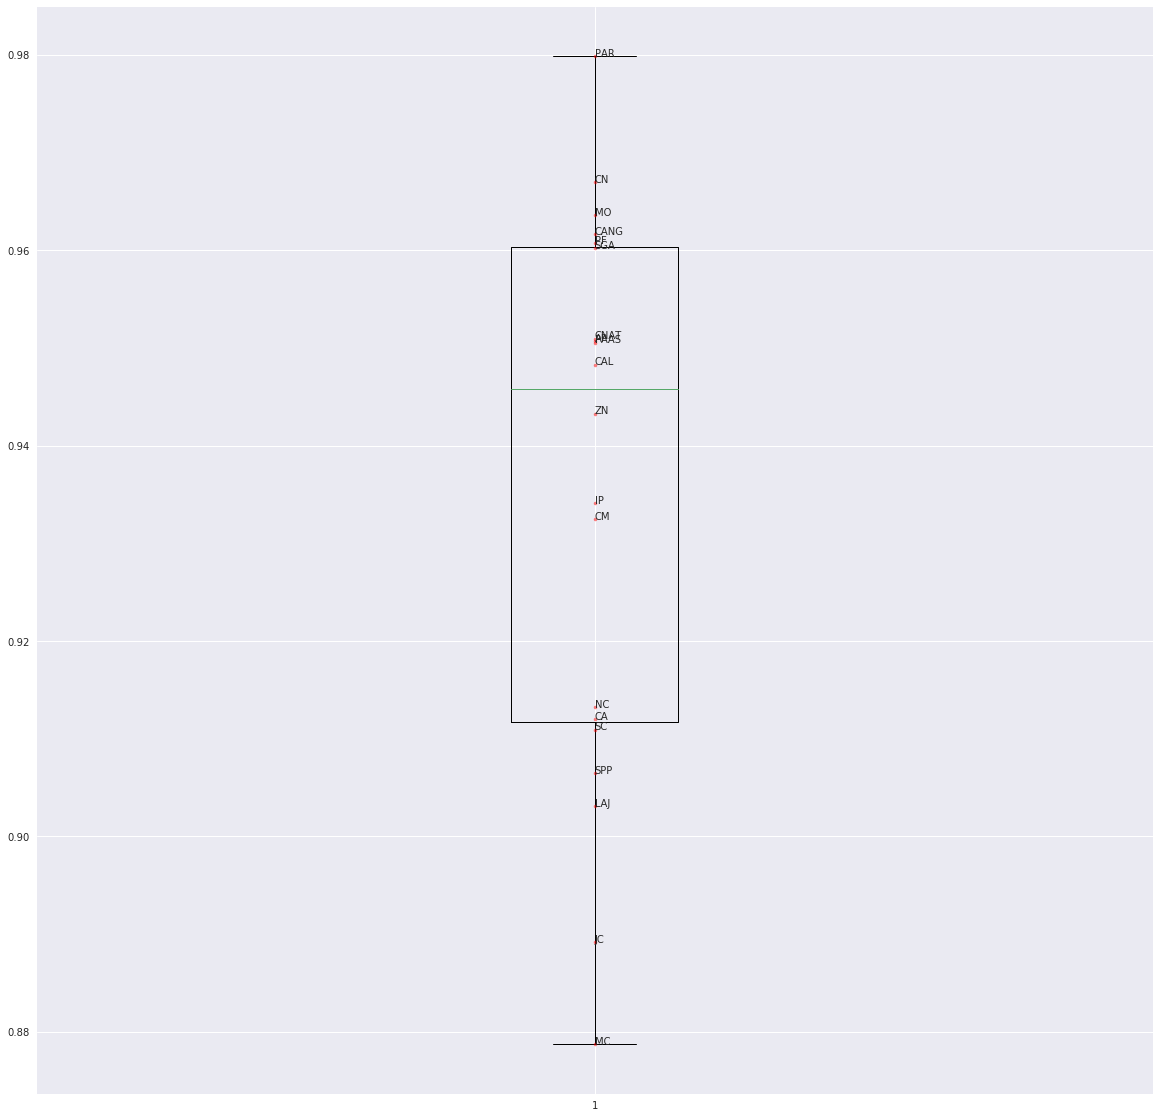

In [12]:
data_plot = []
ind = []

for index1, group1 in dados.groupby(['sigla']):    
    
    qnt_alunos = dados[dados.sigla == index1]['sigla'].count()
    qnt_evasao = dados[(dados.sigla == index1) & (dados.classe == 0)]['sigla'].count()
    tx_evasao  = 1 - qnt_evasao/qnt_alunos
    
    ind.append(index1)
    data_plot.append(tx_evasao)
    
print(data_plot)

fig, ax = plt.subplots(figsize=(20, 20))
plt.boxplot(data_plot)
#plt.plot([1], data_plot, 'r.', alpha=0.5)
plt.plot(np.ones(len(data_plot)), data_plot, 'r.', alpha=0.5)

for i, txt in enumerate( ind ):
    ax.annotate( txt, (1, data_plot[i]), fontsize=10)

# Análise em mapas

In [13]:
sumario_campus = pd.DataFrame()
sumario_campus['LAT'] = ind
sumario_campus['LNG'] = ind
sumario_campus['NOME'] = ind
sumario_campus['tx_evasao'] = data_plot
sumario_campus.index = ind

sumario_campus.loc['AP','LAT'] = -5.626647
sumario_campus.loc['AP','LNG'] = -37.8079408
sumario_campus.loc['AP','NOME'] = 'Apodi'

sumario_campus.loc['CA','LAT'] = -6.4455399
sumario_campus.loc['CA','LNG'] = -37.0690543
sumario_campus.loc['CA','NOME'] = 'Caicó'

sumario_campus.loc['CAL','LAT'] = -5.7882761
sumario_campus.loc['CAL','LNG'] = -35.207484
sumario_campus.loc['CAL','NOME'] = 'Cidade Alta'

sumario_campus.loc['CANG','LAT'] = -6.356481
sumario_campus.loc['CANG','LNG'] = -35.16137
sumario_campus.loc['CANG','NOME'] = 'Canguaretama'

sumario_campus.loc['CM','LAT'] = -5.6526002
sumario_campus.loc['CM','LNG'] = -35.4289211
sumario_campus.loc['CM','NOME'] = 'Ceará-Mirim'

sumario_campus.loc['CN','LAT'] = -6.2522742
sumario_campus.loc['CN','LNG'] = -36.5355755
sumario_campus.loc['CN','NOME'] = 'Currais Novos'

sumario_campus.loc['CNAT','LAT'] = -5.8116998
sumario_campus.loc['CNAT','LNG'] = -35.2032445
sumario_campus.loc['CNAT','NOME'] = 'Natal'

sumario_campus.loc['IP','LAT'] = -5.535475
sumario_campus.loc['IP','LNG'] = -36.870884
sumario_campus.loc['IP','NOME'] = 'Ipanguaçu'

sumario_campus.loc['JC','LAT'] = -5.5445745
sumario_campus.loc['JC','LNG'] = -35.7977312
sumario_campus.loc['JC','NOME'] = 'João Câmara'

sumario_campus.loc['LAJ','LAT'] = -5.7045319
sumario_campus.loc['LAJ','LNG'] = -36.2354056
sumario_campus.loc['LAJ','NOME'] = 'Lajes'

sumario_campus.loc['MC','LAT'] = -5.1519506
sumario_campus.loc['MC','LNG'] = -36.5749401
sumario_campus.loc['MC','NOME'] = 'Macau'

sumario_campus.loc['MO','LAT'] = -5.2137844
sumario_campus.loc['MO','LNG'] = -37.3193046
sumario_campus.loc['MO','NOME'] = 'Mossoró'

sumario_campus.loc['NC','LAT'] = -6.4705831
sumario_campus.loc['NC','LNG'] = -35.4449409
sumario_campus.loc['NC','NOME'] = 'Nova Cruz'

sumario_campus.loc['PAAS','LAT'] = -6.6996818
sumario_campus.loc['PAAS','LNG'] = -36.6674975
sumario_campus.loc['PAAS','NOME'] = 'Parelhas'

sumario_campus.loc['PAR','LAT'] = -5.938754
sumario_campus.loc['PAR','LNG'] = -35.2664888
sumario_campus.loc['PAR','NOME'] = 'Parnamirim'

sumario_campus.loc['PF','LAT'] = -6.1457562
sumario_campus.loc['PF','LNG'] = -38.2037518
sumario_campus.loc['PF','NOME'] = 'Pau dos Ferros'

sumario_campus.loc['SC','LAT'] = -6.2278238
sumario_campus.loc['SC','LNG'] = -36.0270737
sumario_campus.loc['SC','NOME'] = 'Santa Cruz'

sumario_campus.loc['SGA','LAT'] = -5.7242691
sumario_campus.loc['SGA','LNG'] = -35.2404887
sumario_campus.loc['SGA','NOME'] = 'São Gonçalo do Amarante'

sumario_campus.loc['SPP','LAT'] = -5.8954807
sumario_campus.loc['SPP','LNG'] = -35.7544978
sumario_campus.loc['SPP','NOME'] = 'São Paulo do Potengi'

sumario_campus.loc['ZN','LAT'] = -5.7491553
sumario_campus.loc['ZN','LNG'] = -35.2602211
sumario_campus.loc['ZN','NOME'] = 'Zona norte'

sumario_campus

,LAT,LNG,NOME,tx_evasao
AP,-5.62665,-37.8079,Apodi,0.950704
CA,-6.44554,-37.0691,Caicó,0.912014
CAL,-5.78828,-35.2075,Cidade Alta,0.948276
CANG,-6.35648,-35.1614,Canguaretama,0.961661
CM,-5.6526,-35.4289,Ceará-Mirim,0.932462
CN,-6.25227,-36.5356,Currais Novos,0.966960
CNAT,-5.8117,-35.2032,Natal,0.950943
IP,-5.53547,-36.8709,Ipanguaçu,0.934097
JC,-5.54457,-35.7977,João Câmara,0.889197
LAJ,-5.70453,-36.2354,Lajes,0.903101


In [15]:
# Create a map object
m = folium.Map(
    location=[-5.817691, -36.445725],
    zoom_start=8,
    tiles='Stamen Terrain'
)

# Dictionary for colors
unit_type_colors = {
    1: 'green',
    0: 'red',
}

# Dictionary for icons
unit_type_icons = {
    'Elem': 'graduation-cap',
    'KGAR': 'odnoklassniki',
}

In [18]:
# Ploting the educational units on map

for index, row in sumario_campus.iterrows():
    folium.Marker([row['LAT'], row['LNG']],
                  icon=folium.Icon(
                          color = 'green',
                          #icon = 'graduation-cap',
                          prefix='fa'),
                  popup = index
        ).add_to(m)

# Add fullscreen button
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m

In [21]:
# load the data and use 'latin-1'encoding because the accent
geo_json_data = json.load(open('geojson/geojs-24-mun.json',encoding='latin-1'))

cities = []
# list all cities in the state
for city in geo_json_data['features']:
        cities.append(city['properties']['description'])
#cities

colormap = linear.YlGn.scale(
    sumario_campus.tx_evasao.min(),
    sumario_campus.tx_evasao.max())

sumario_campus['tx_evasao'] = 1 - sumario_campus['tx_evasao']

# Create a map object
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=7,
    tiles='Stamen Terrain'
)

# create a threshold of legend
threshold_scale = np.linspace(sumario_campus.tx_evasao.min(),
                              sumario_campus.tx_evasao.max(), 6, dtype=int).tolist()


for index, row in sumario_campus.iterrows():
    folium.Marker([row['LAT'], row['LNG']],
                  icon=folium.Icon(
                          color = 'green',
                          #icon = 'graduation-cap',
                          prefix='fa'),
                  popup = '({}, {})'.format(index, row['tx_evasao'])
        ).add_to(m)

m.choropleth(
    geo_data=geo_json_data,
    data=sumario_campus,
    columns=['NOME', 'tx_evasao'],
    key_on='feature.properties.description',
    fill_color='YlOrRd',
    legend_name='Taxa de Sucesso',
    highlight=True,
    #threshold_scale = threshold_scale
)

m

# Análise de correspondência

LnguaPortuguesaeLiteraturaI90H
------------------------------


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


LnguaPortuguesaeLiteraturaI90H_dependencia
------------------------------------------
LnguaPortuguesaeLiteraturaI90H_freq
-----------------------------------
MatemticaI120H
--------------


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


MatemticaI120H_dependencia
--------------------------
MatemticaI120H_freq
-------------------
acompanhamento
--------------
aluno_exclusivo_rede_publica
----------------------------
artificial
----------
conceito
--------
conceito_freq
-------------
descricao
---------
descricao_area_residencial
--------------------------
descricao_companhia_domiciliar
------------------------------
descricao_estado_civil
----------------------
descricao_historico
-------------------
descricao_imovel
----------------
descricao_mae_escolaridade
--------------------------
descricao_pai_escolaridade
--------------------------
descricao_raca
--------------
descricao_responsavel_escolaridade
----------------------------------
descricao_responsavel_financeiro
--------------------------------
descricao_trabalho
------------------
idade
-----
pessoa_fisica__sexo
-------------------
possui_necessidade_especial
---------------------------
qnt_pc
------
qnt_salarios
------------
qtd_pessoas_domicilio
------------

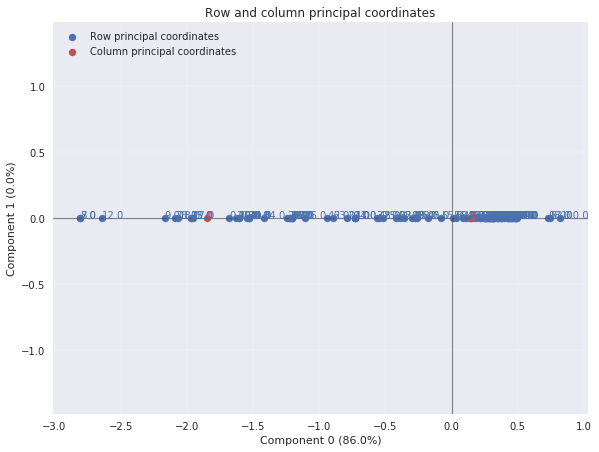

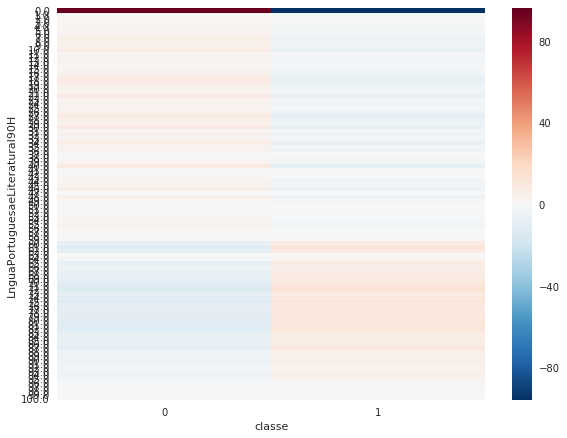

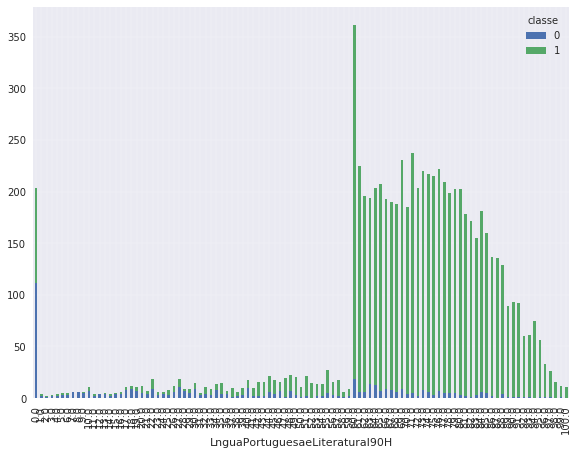

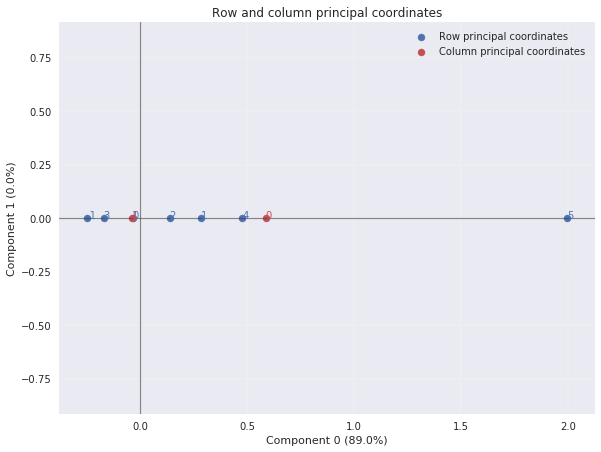

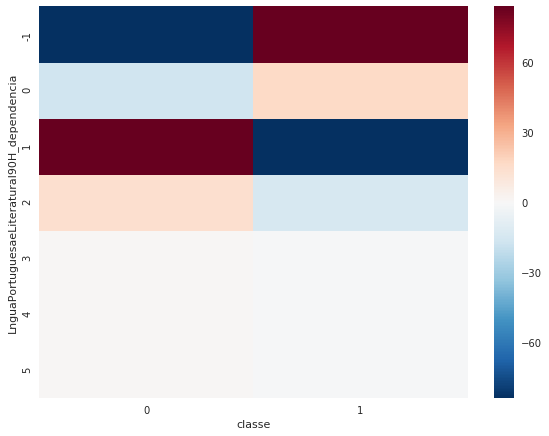

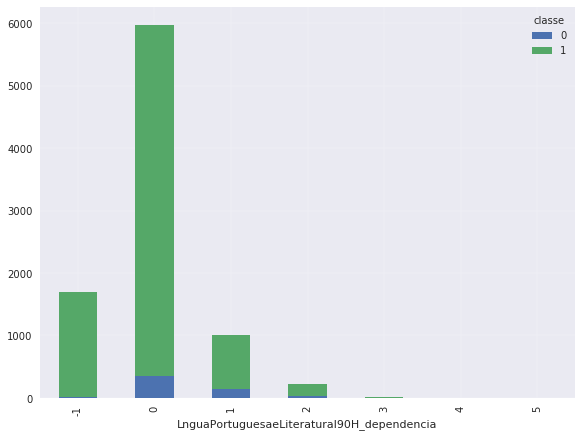

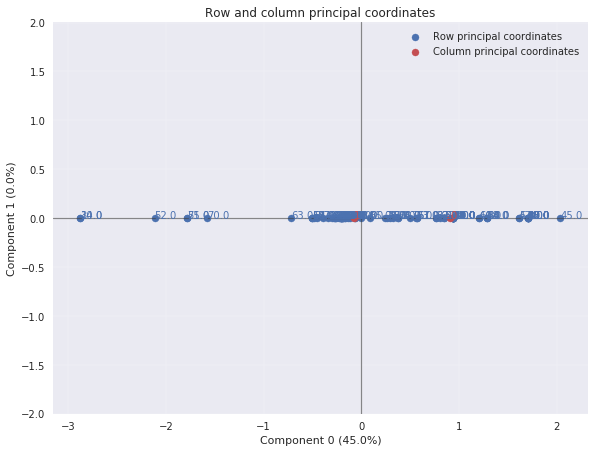

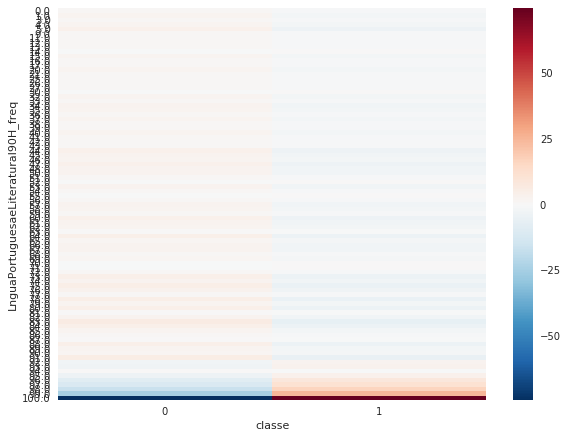

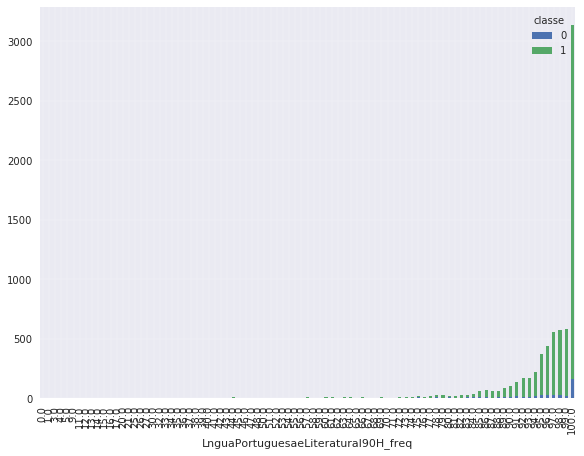

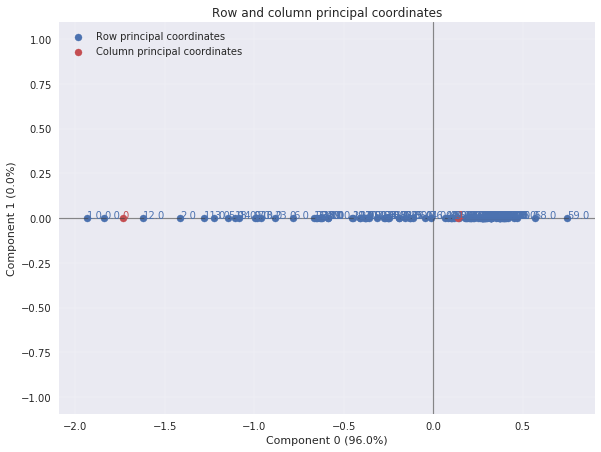

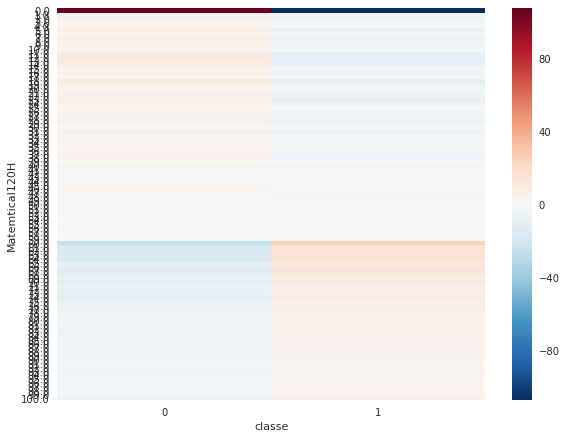

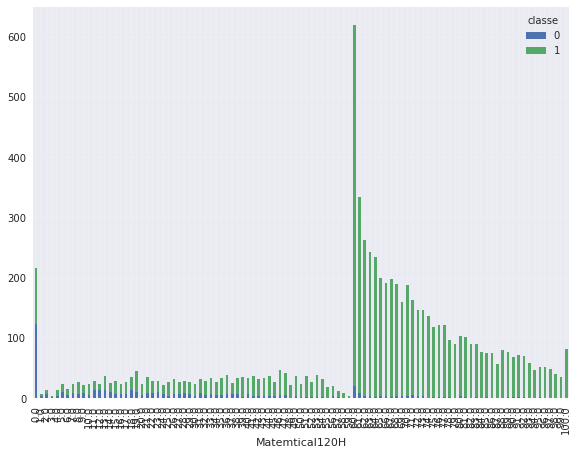

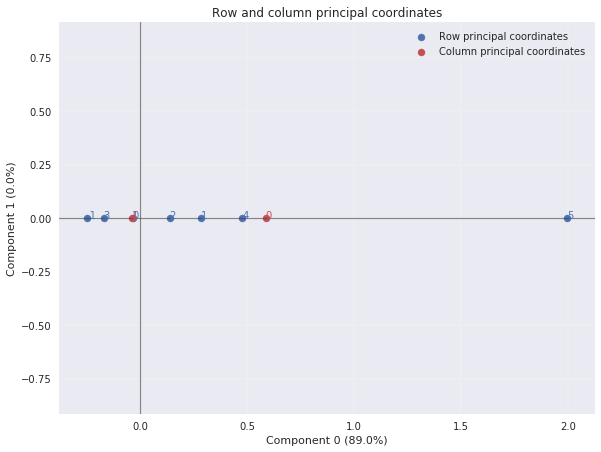

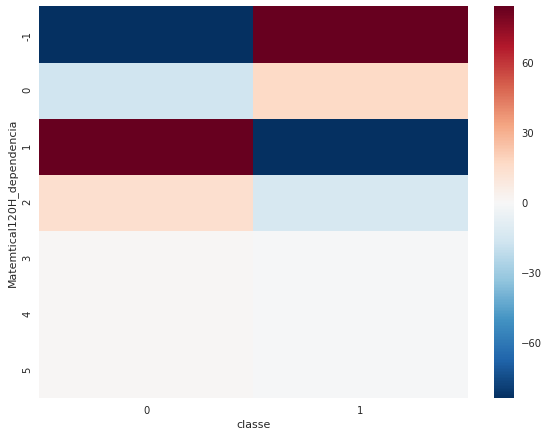

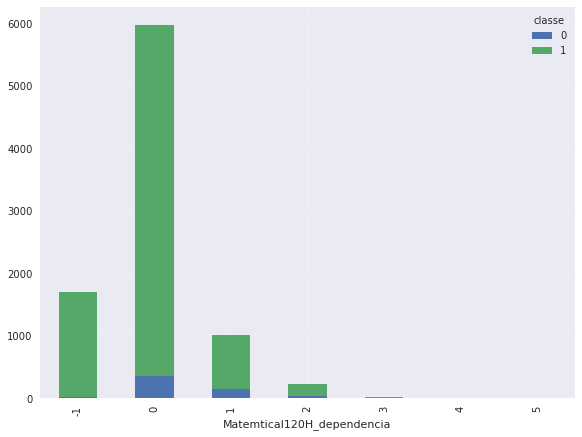

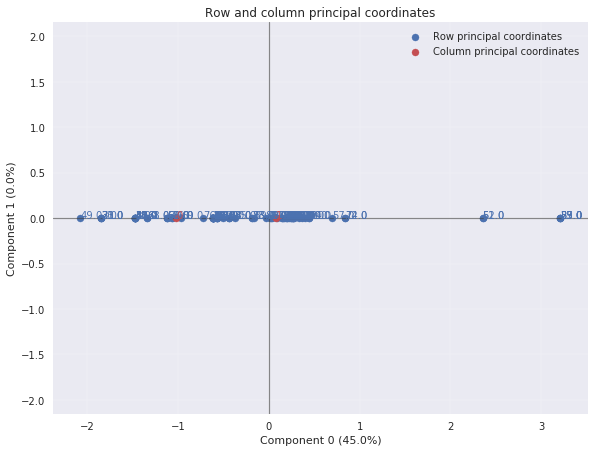

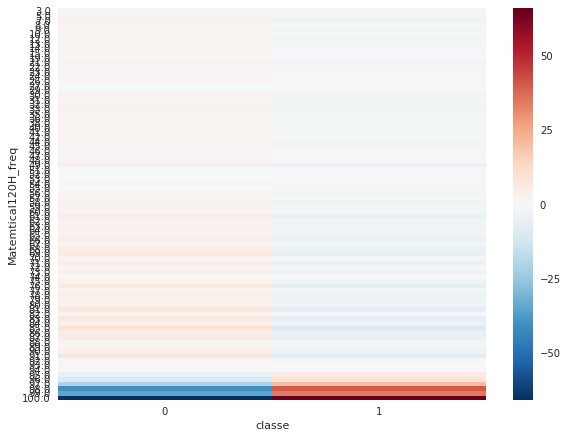

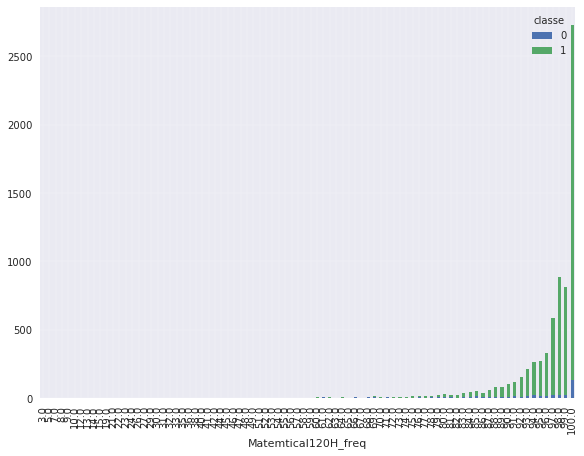

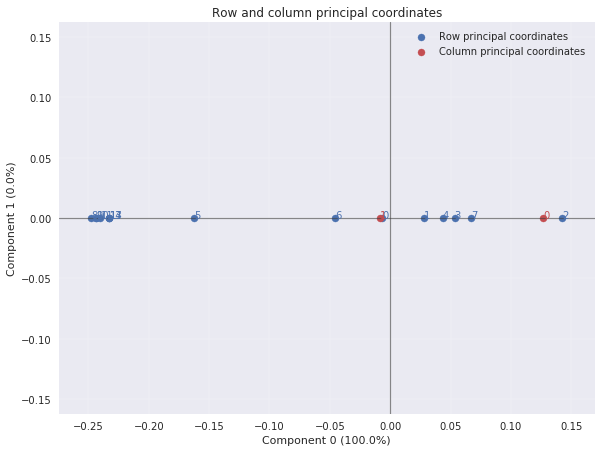

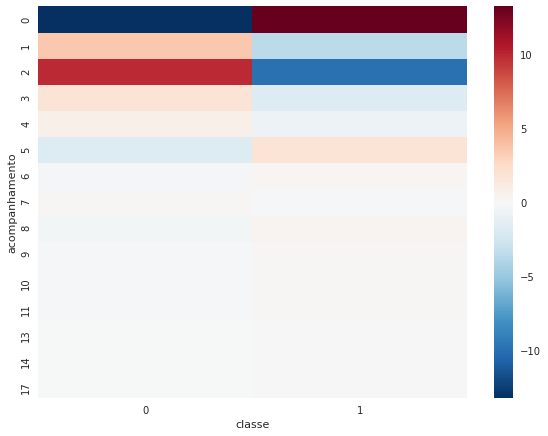

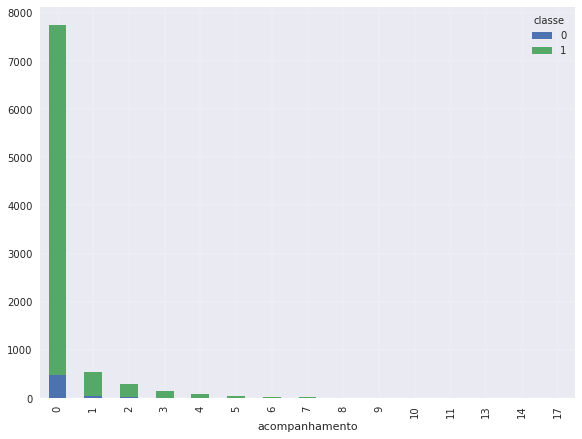

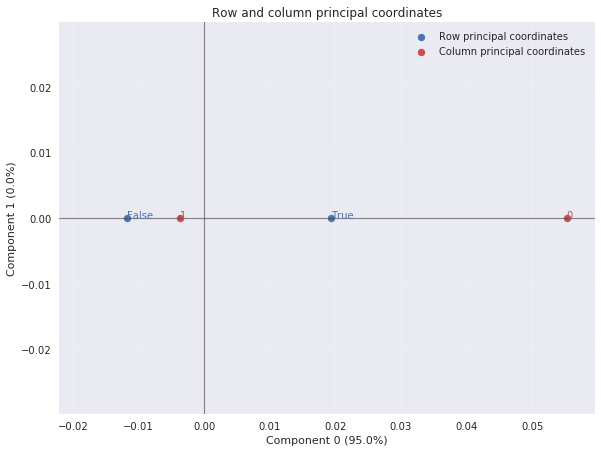

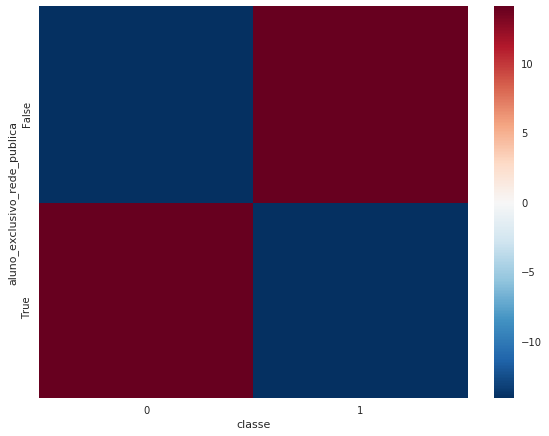

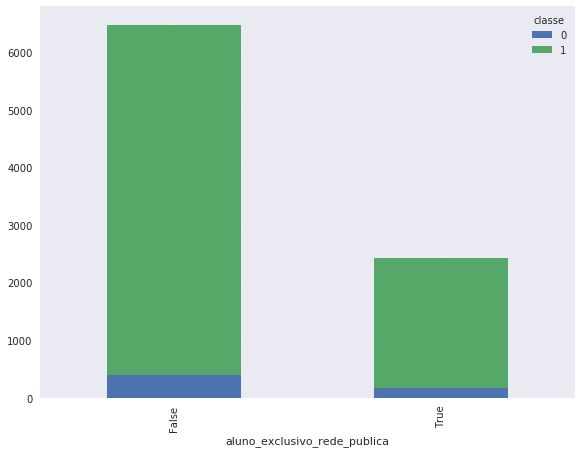

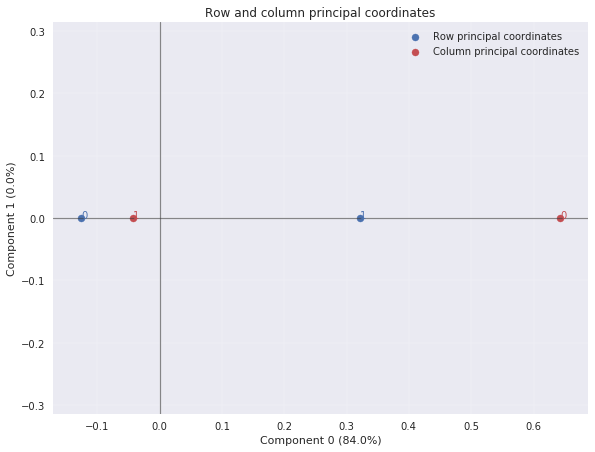

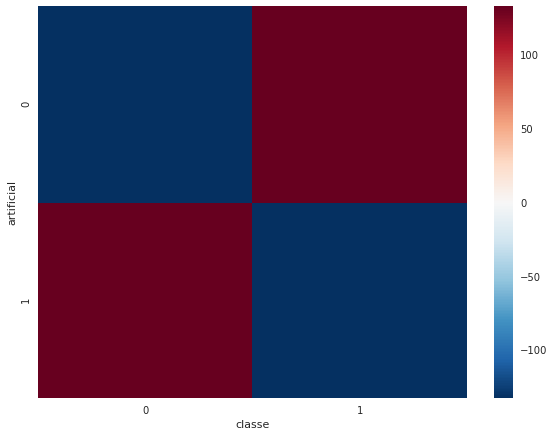

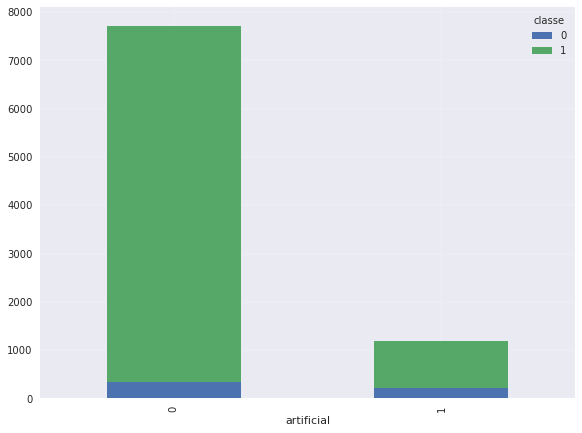

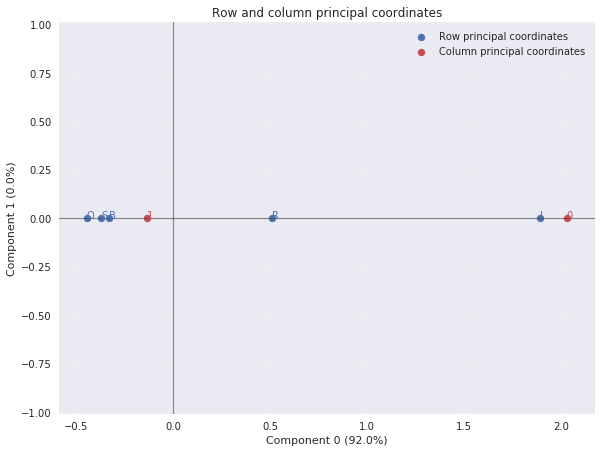

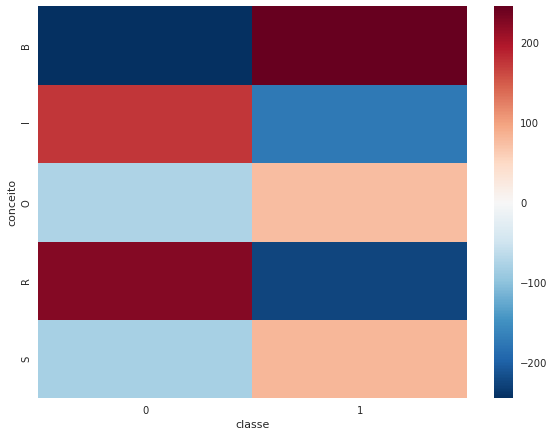

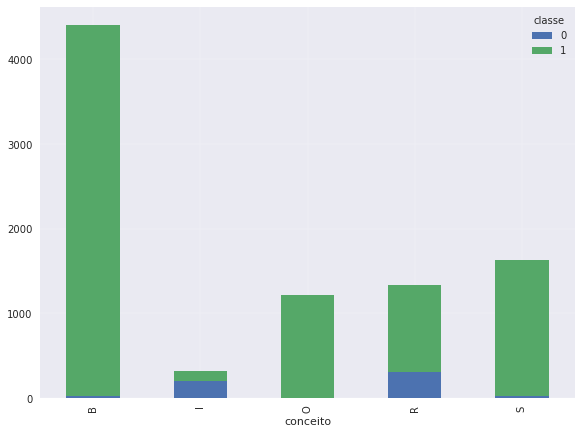

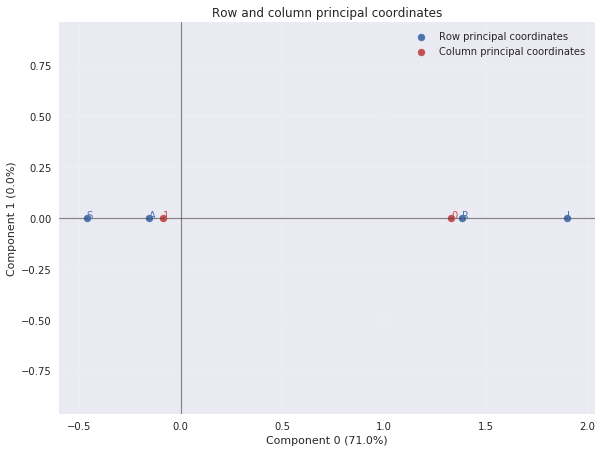

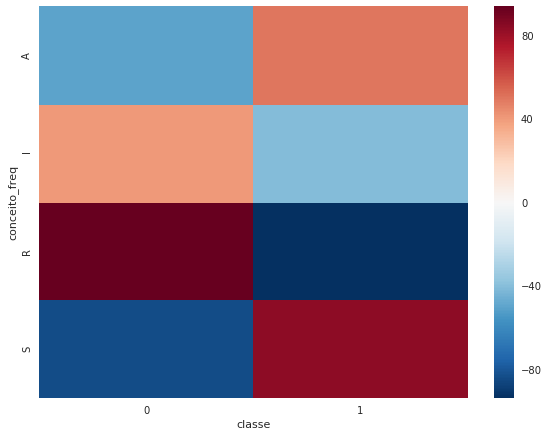

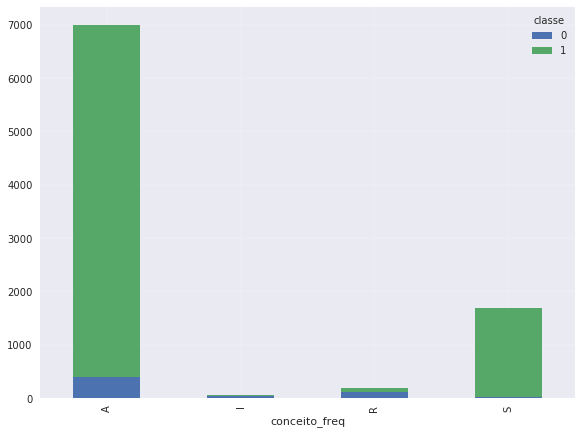

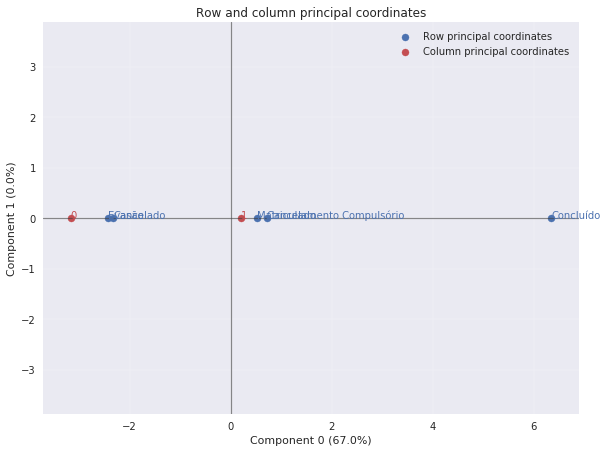

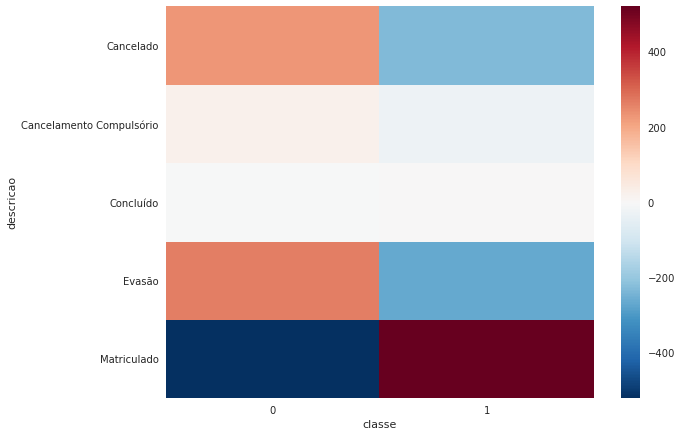

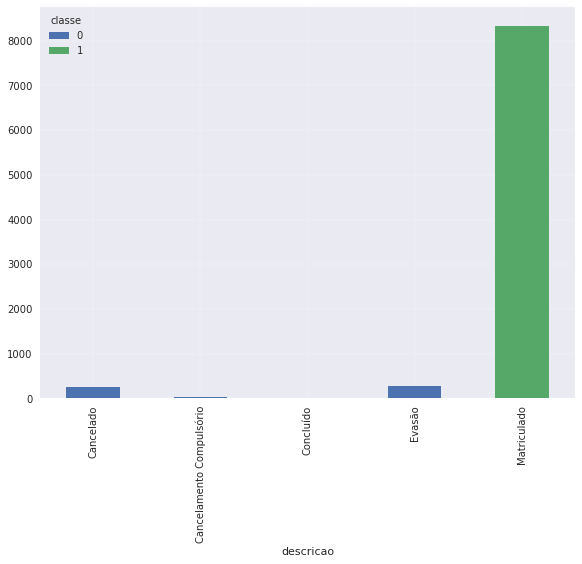

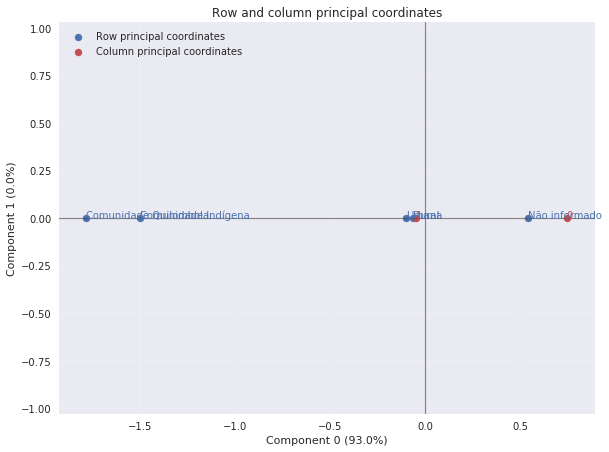

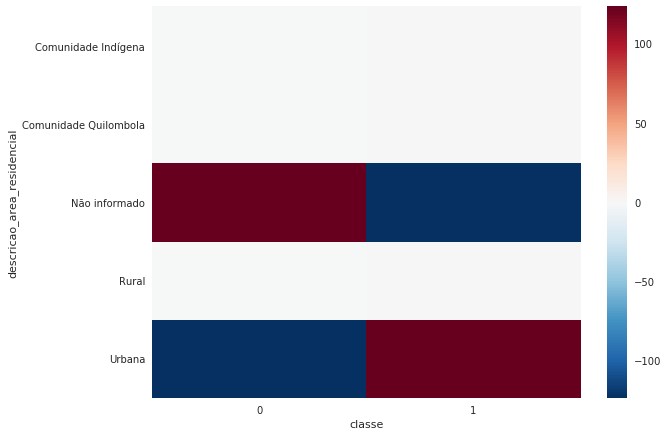

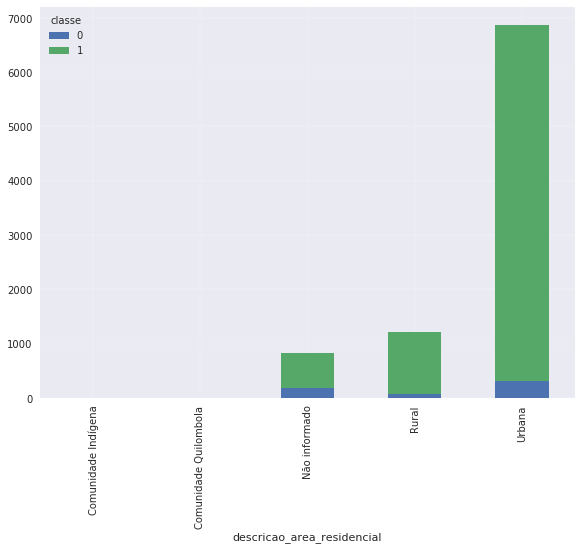

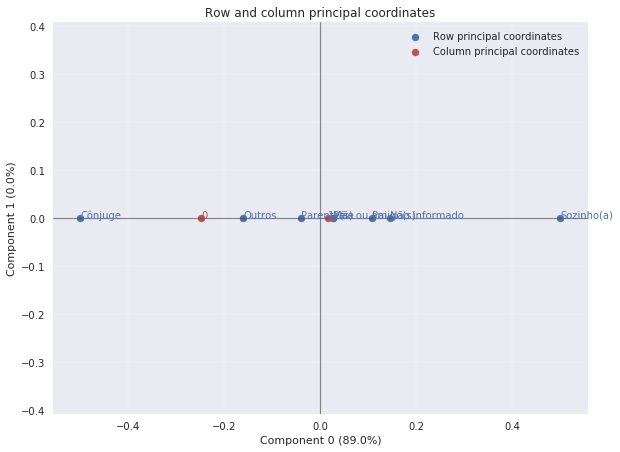

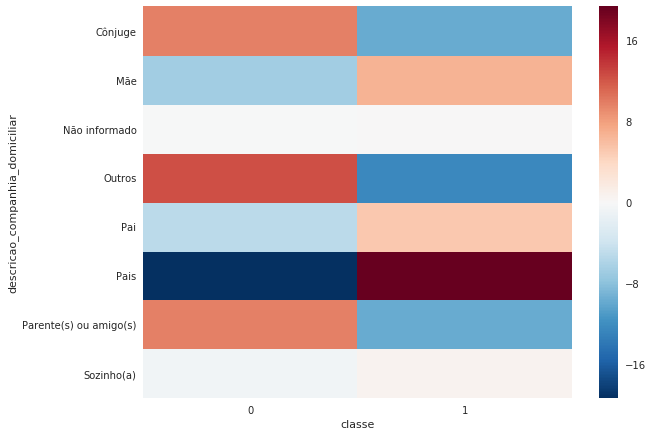

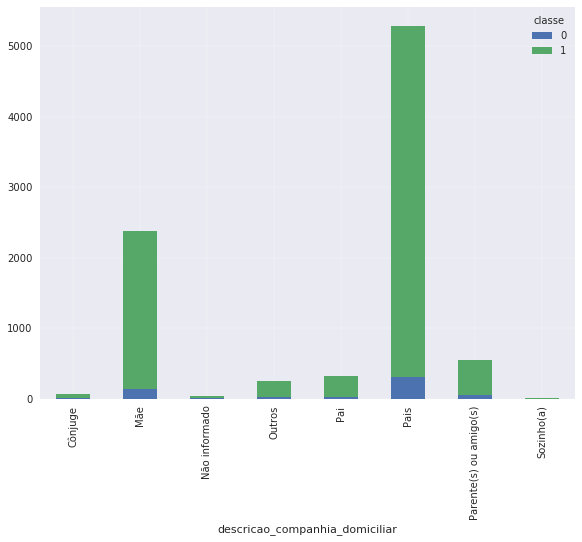

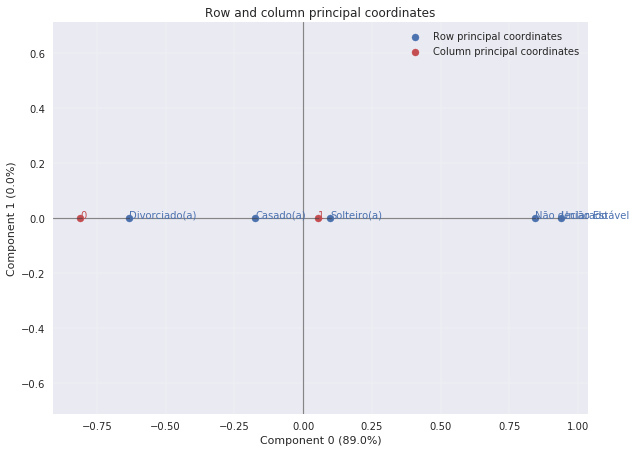

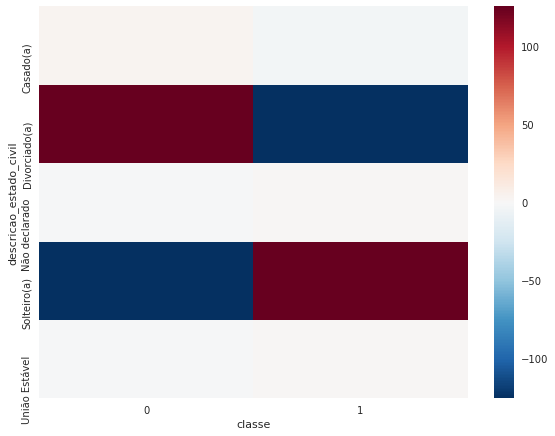

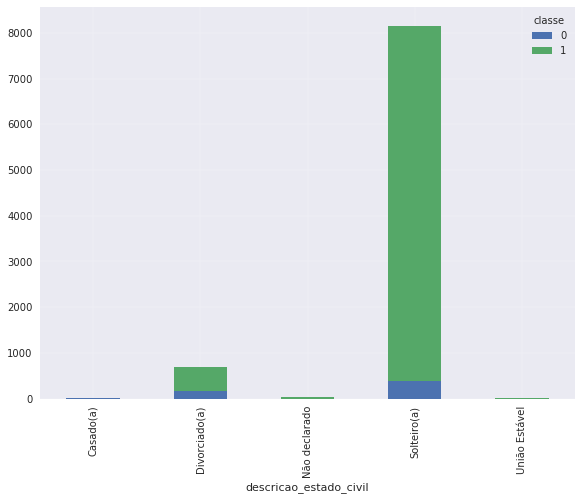

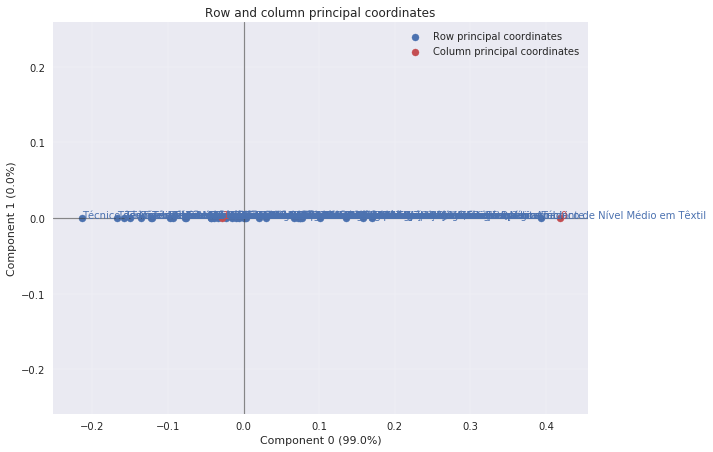

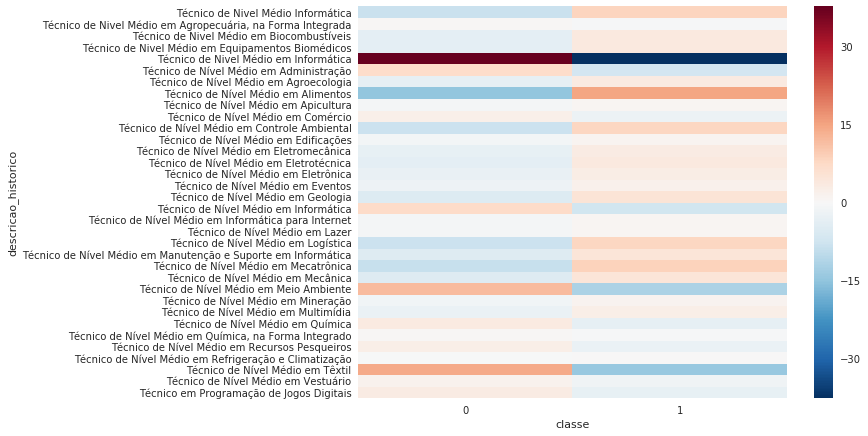

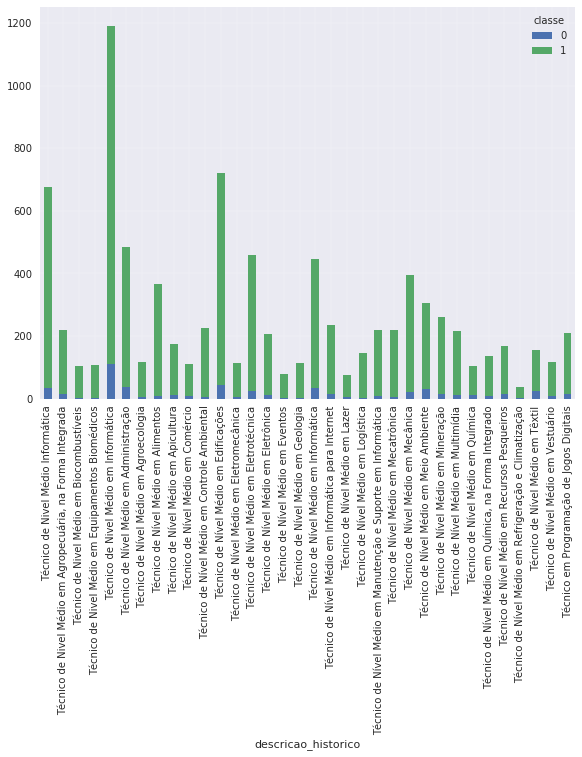

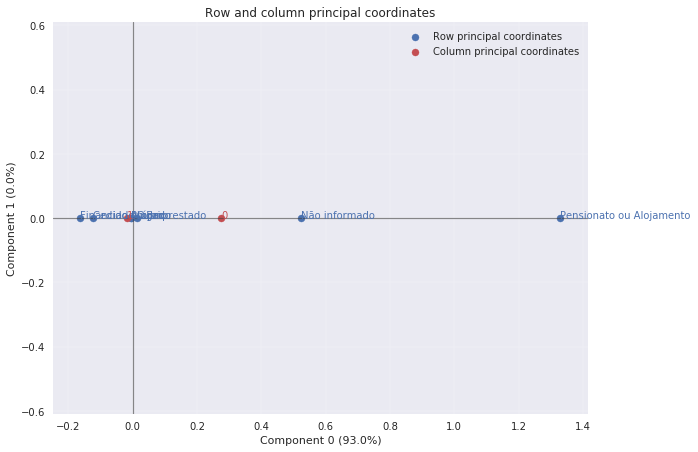

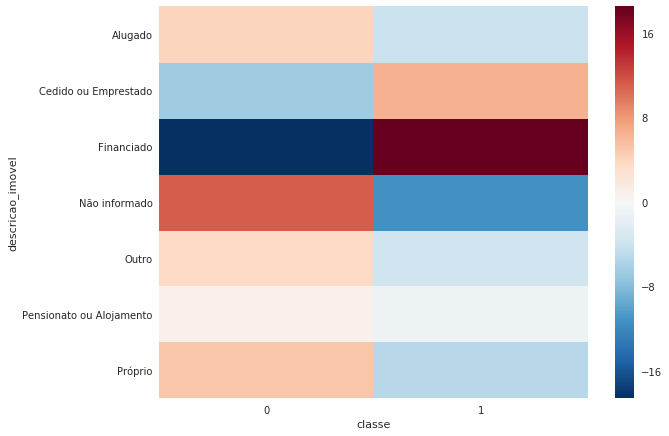

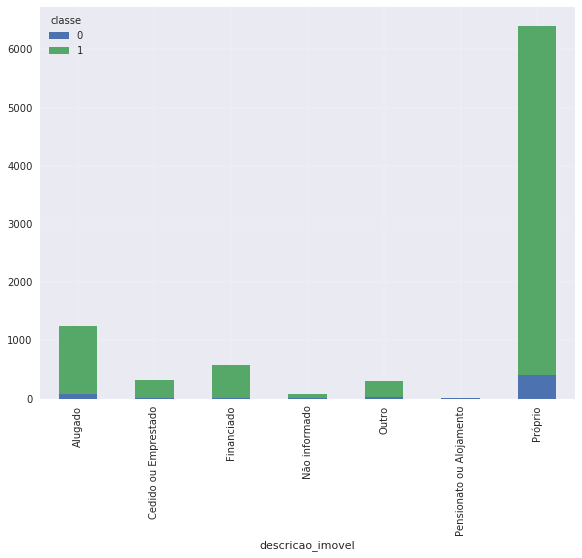

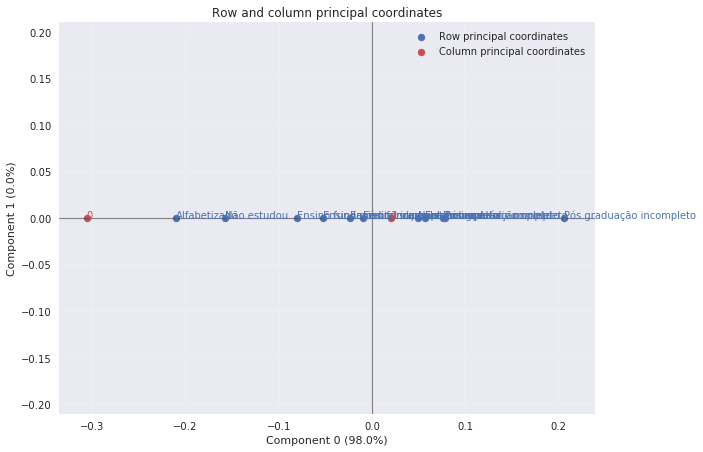

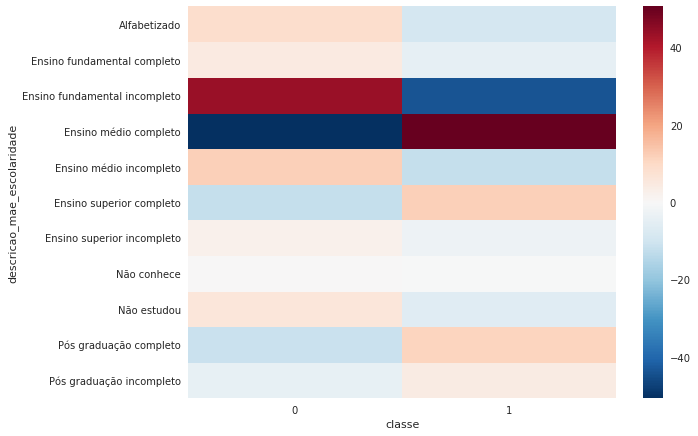

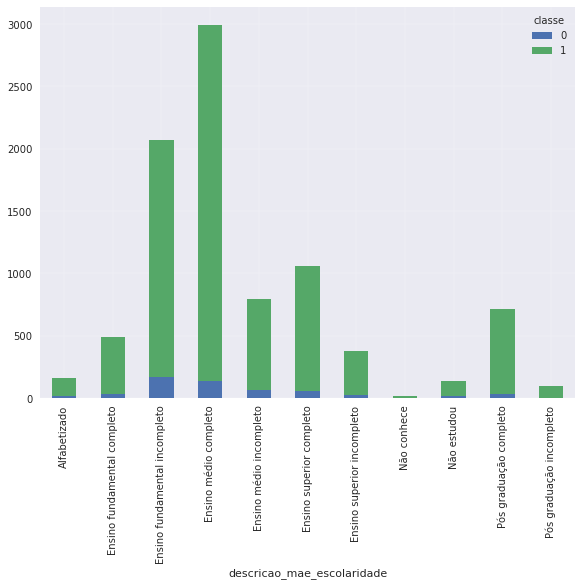

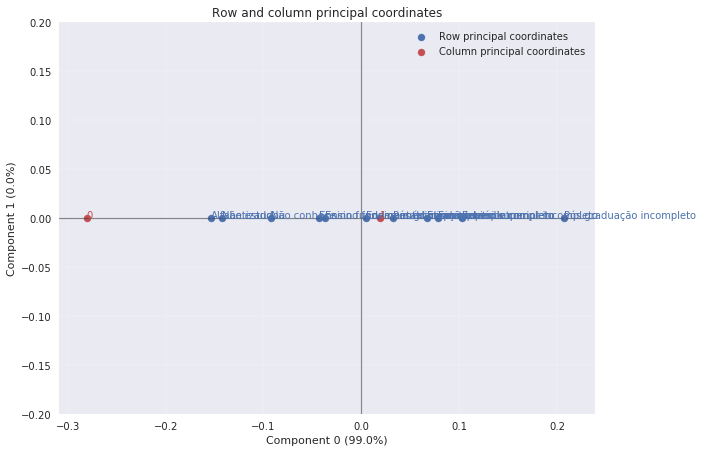

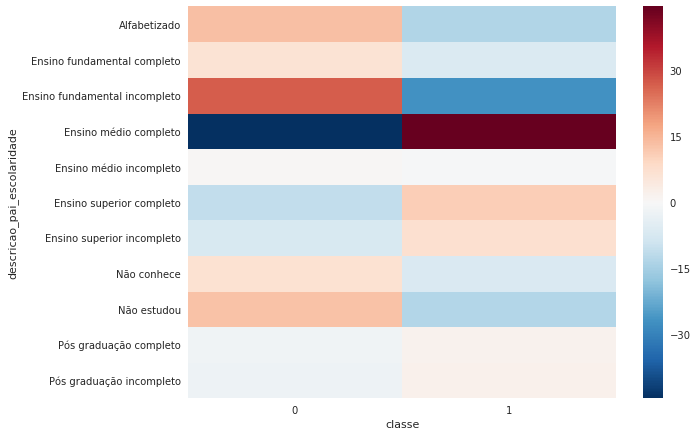

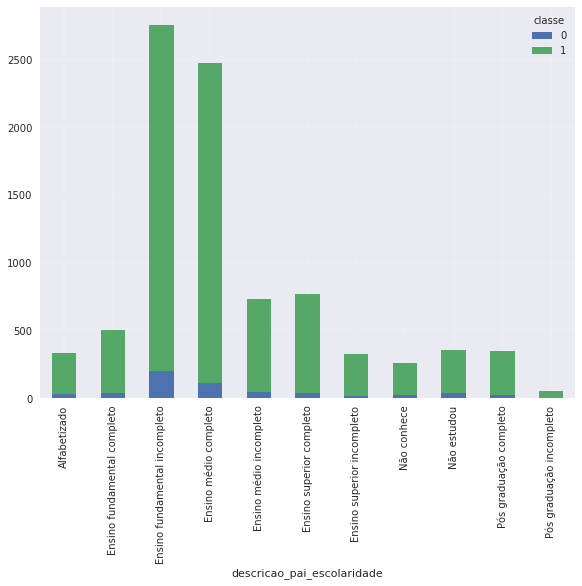

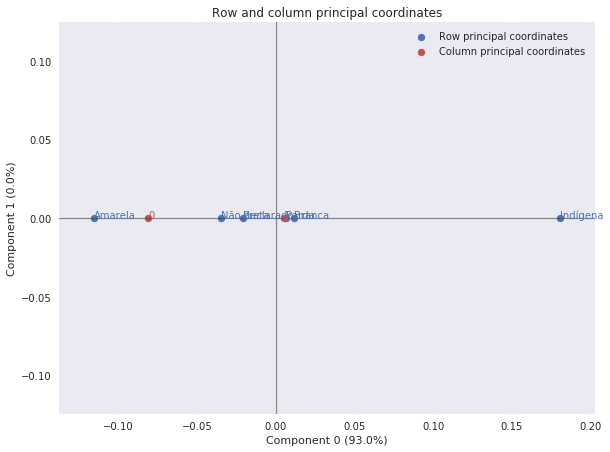

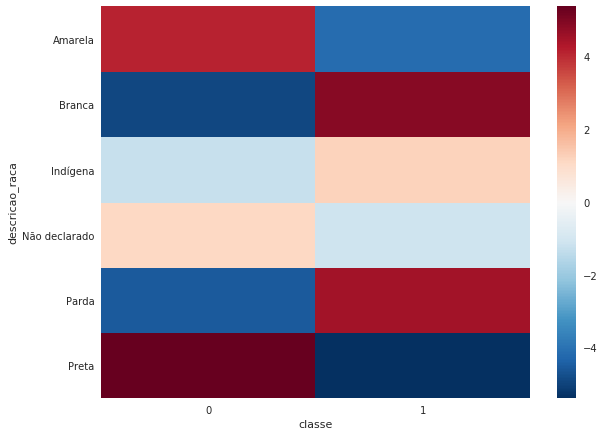

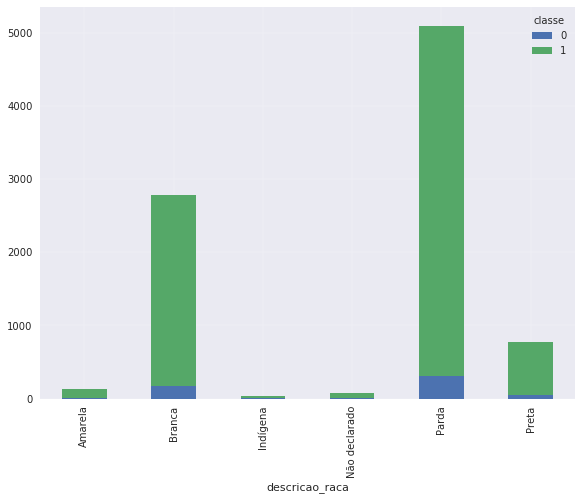

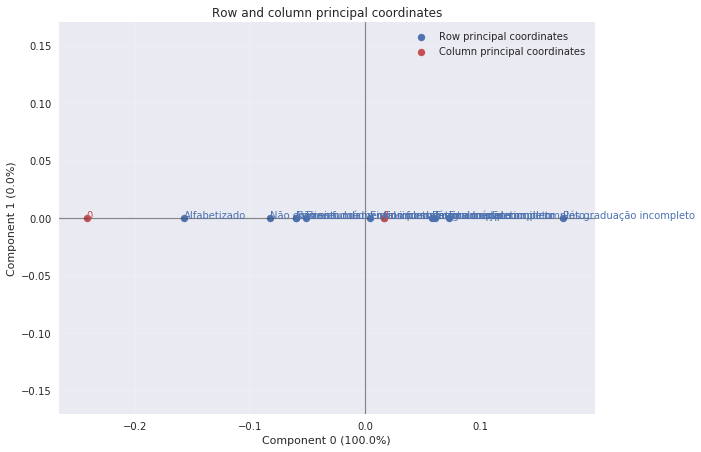

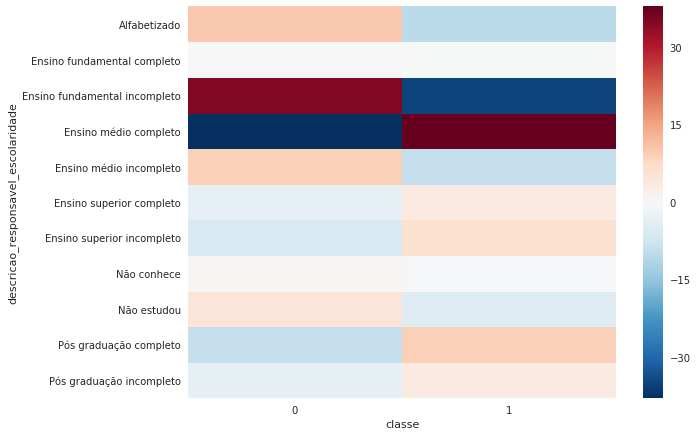

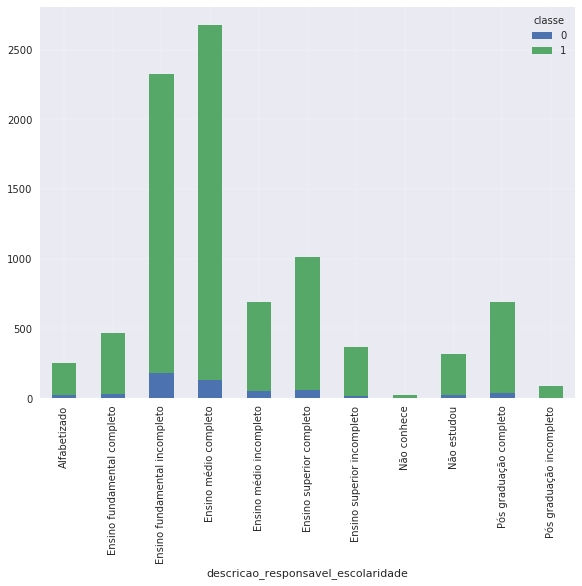

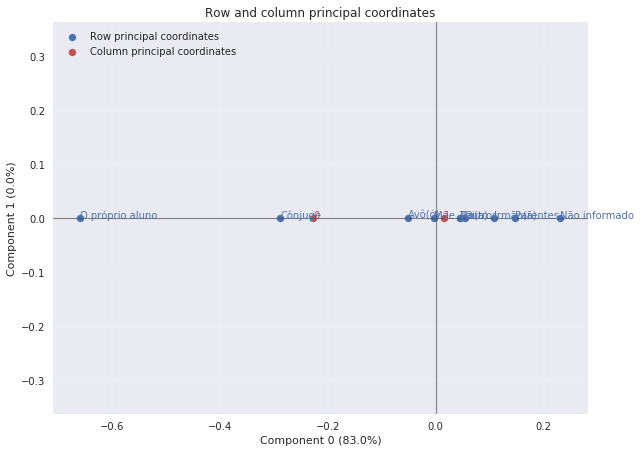

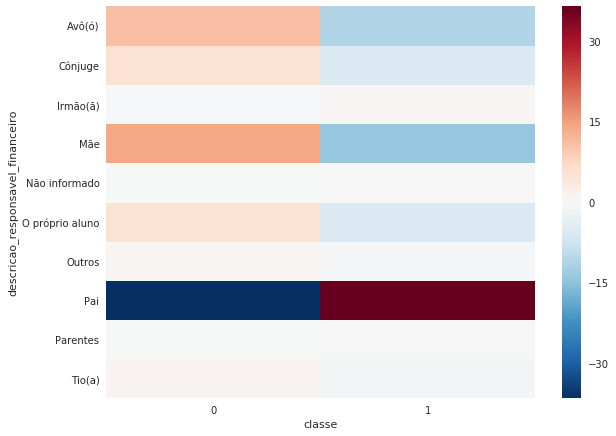

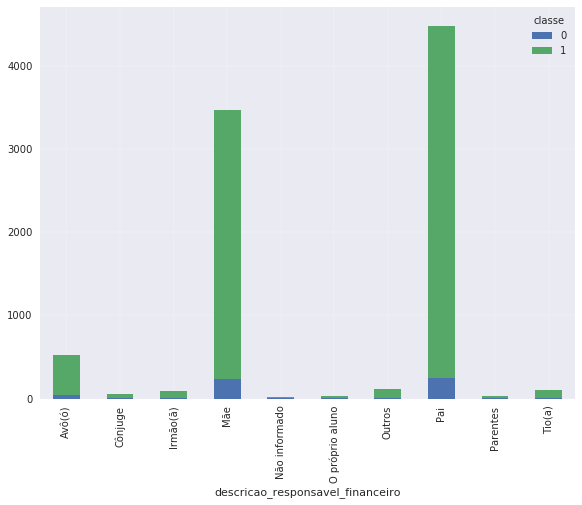

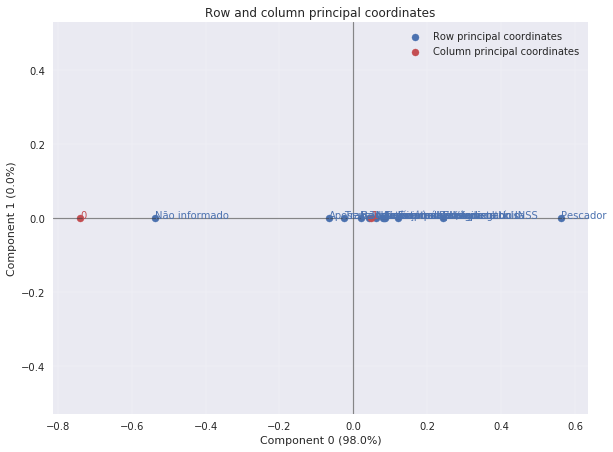

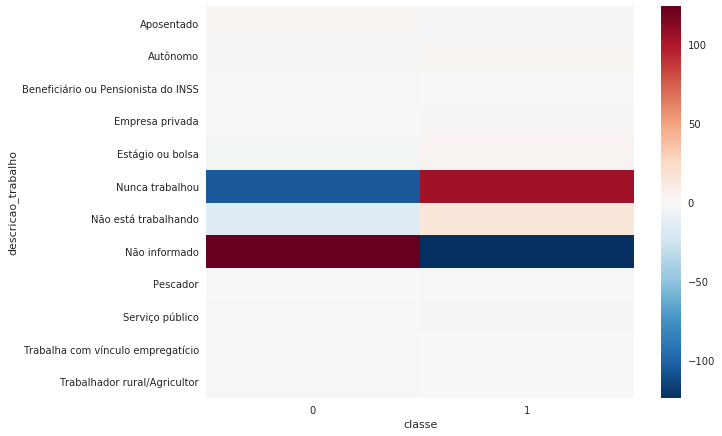

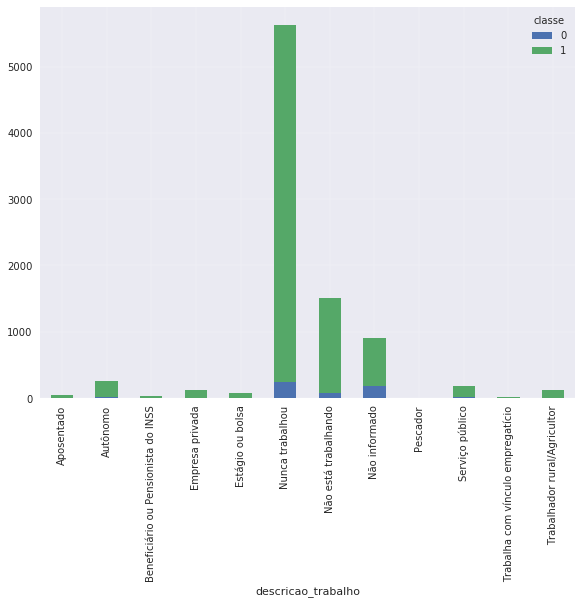

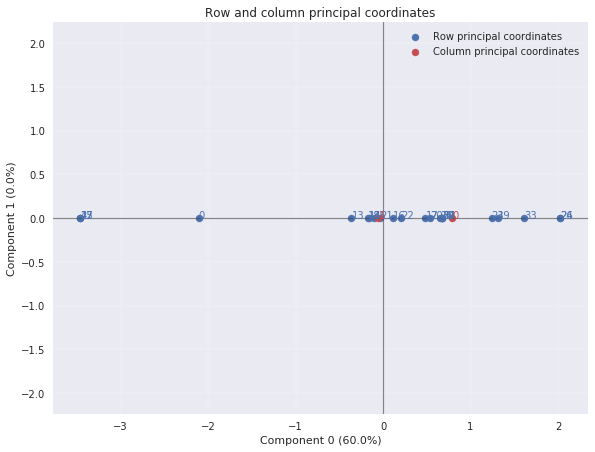

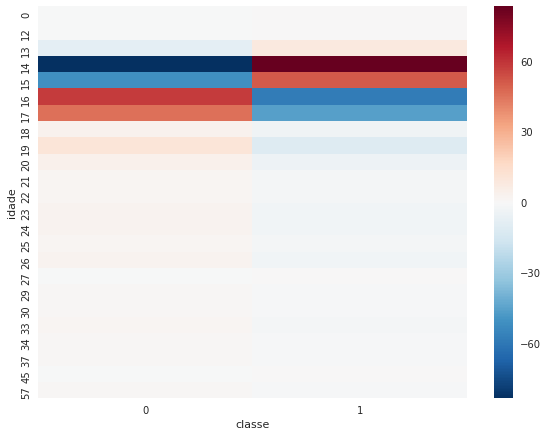

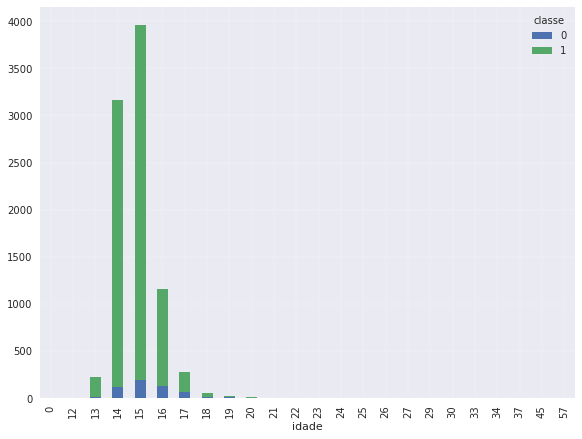

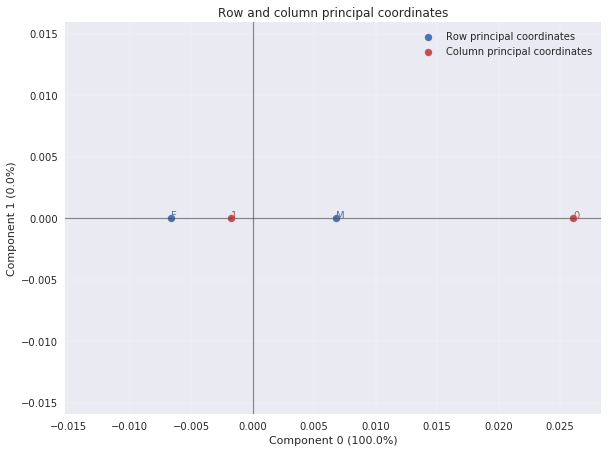

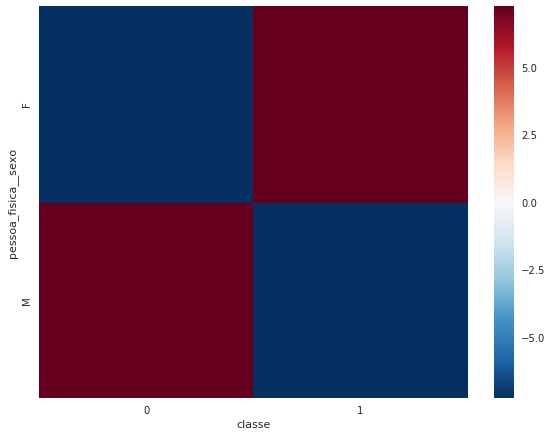

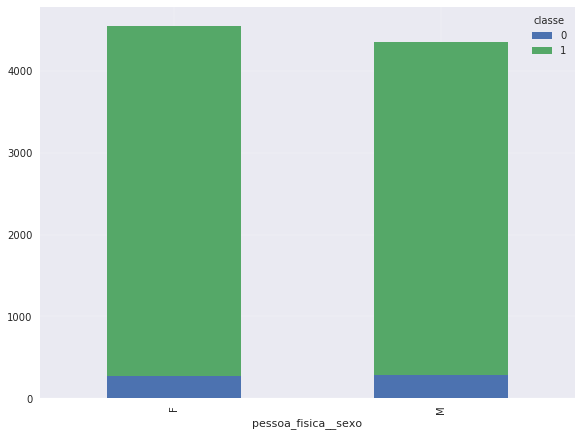

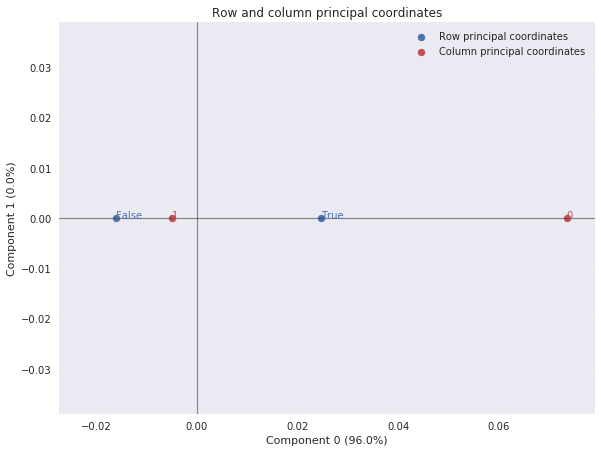

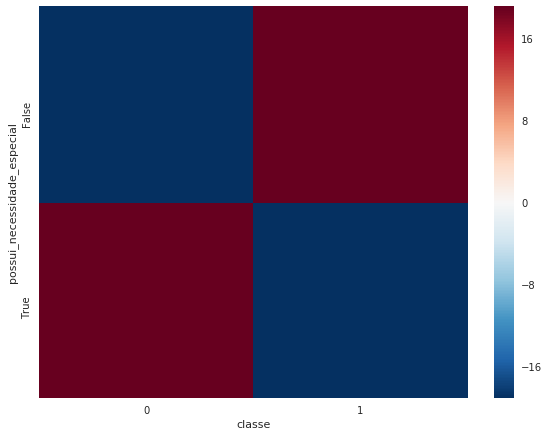

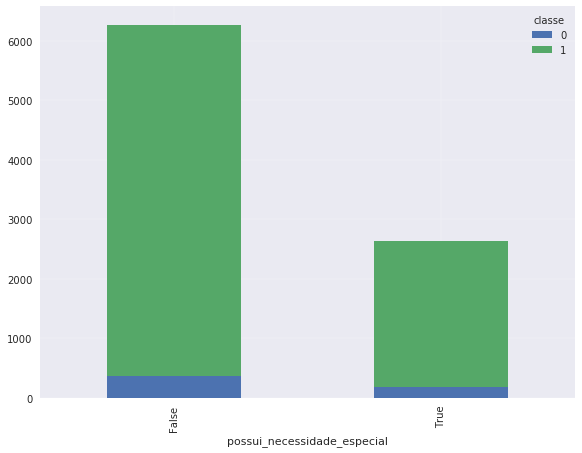

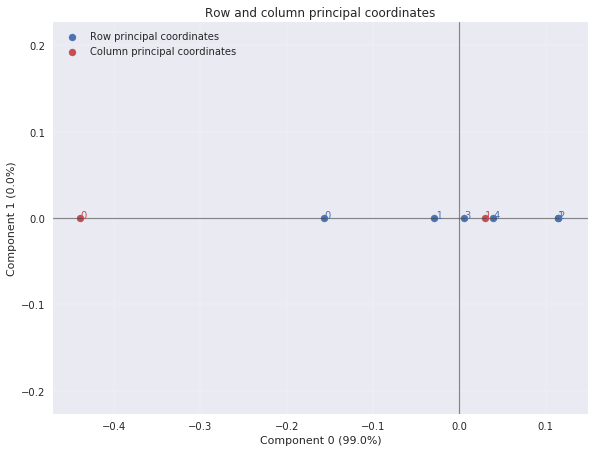

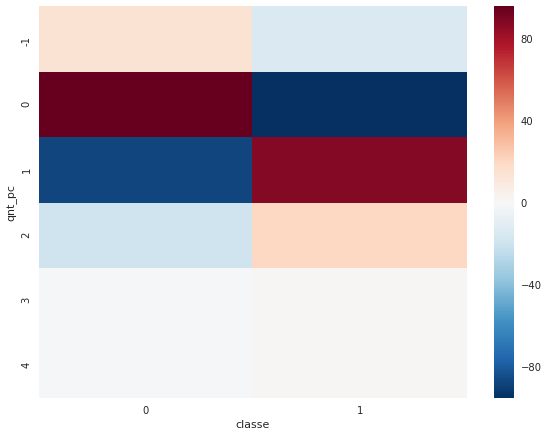

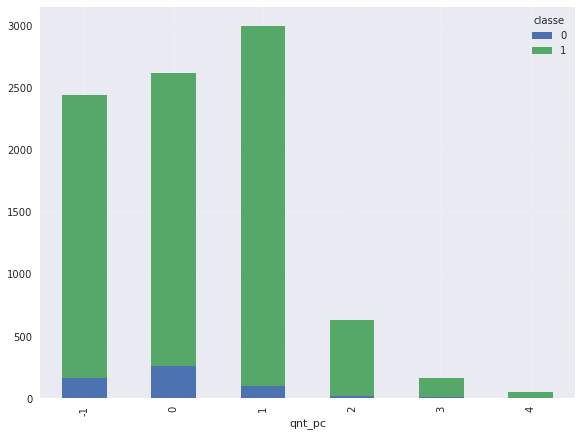

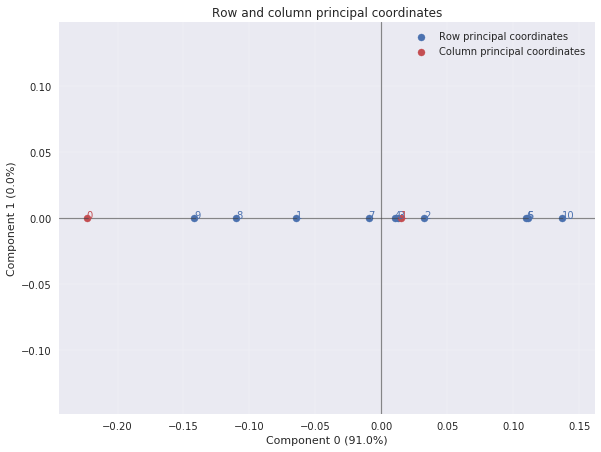

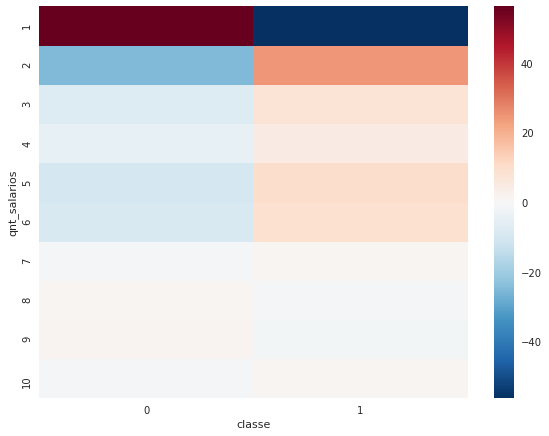

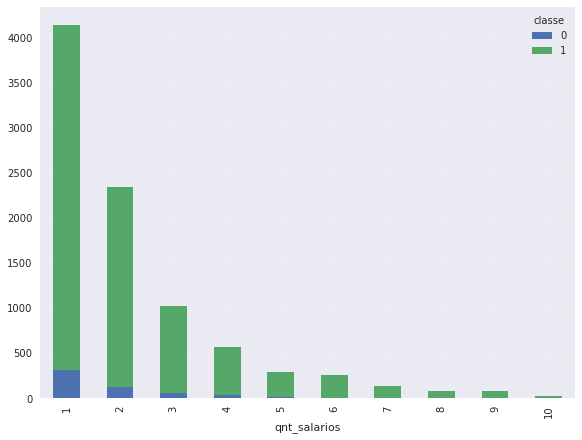

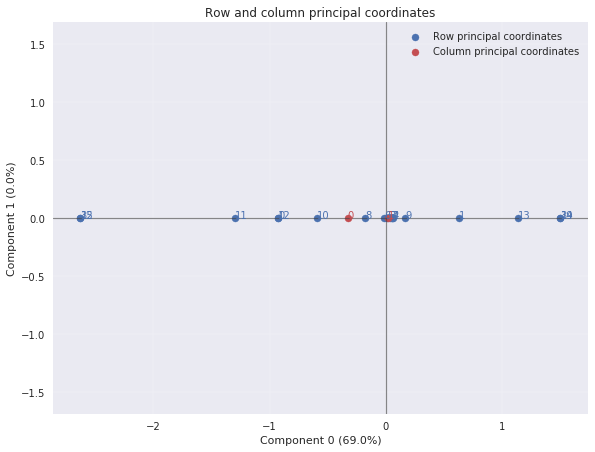

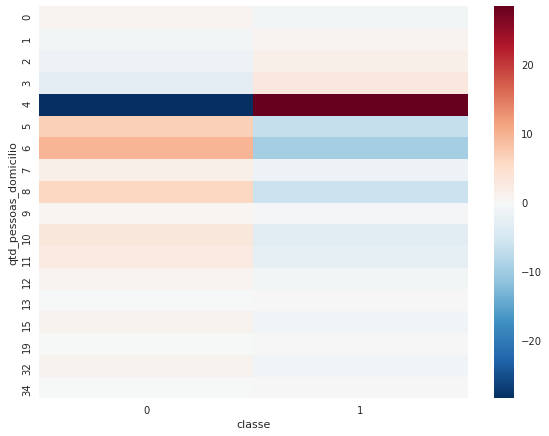

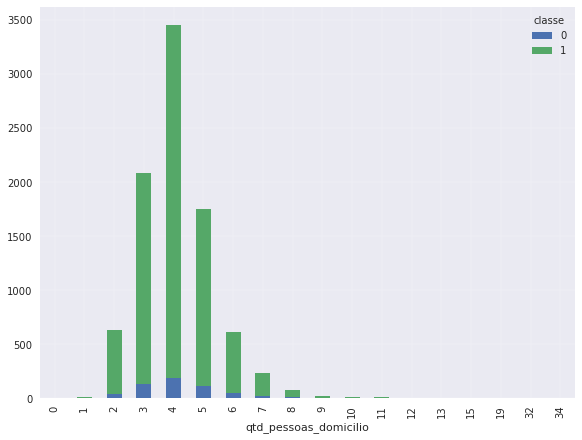

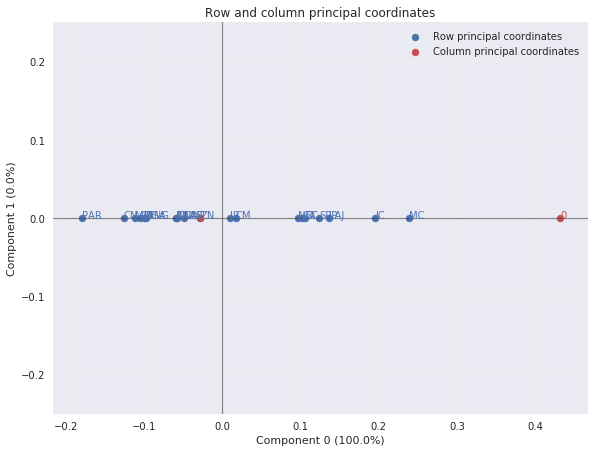

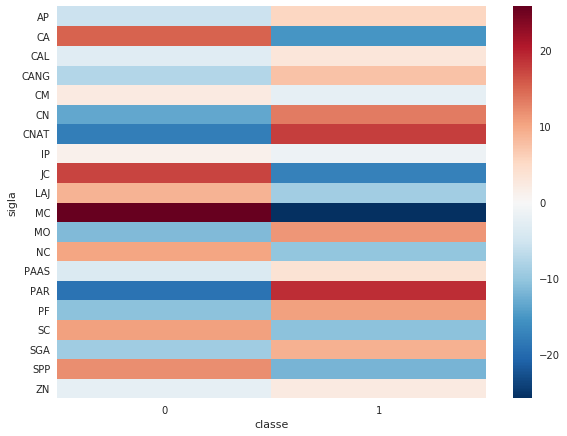

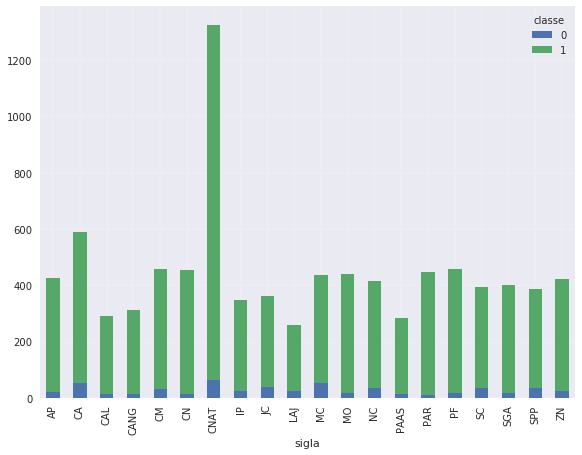

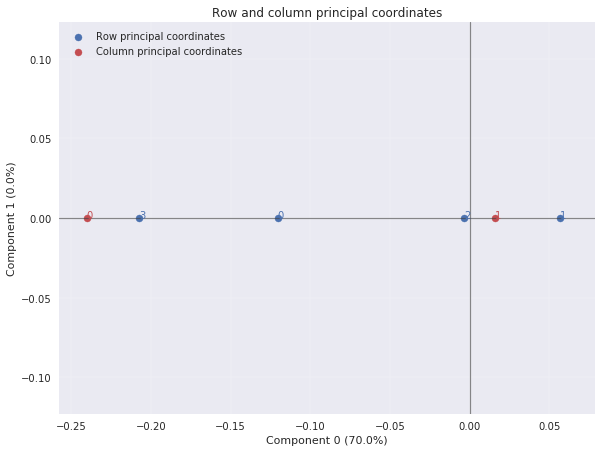

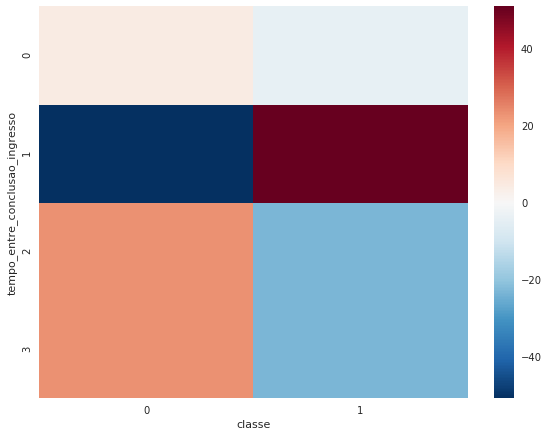

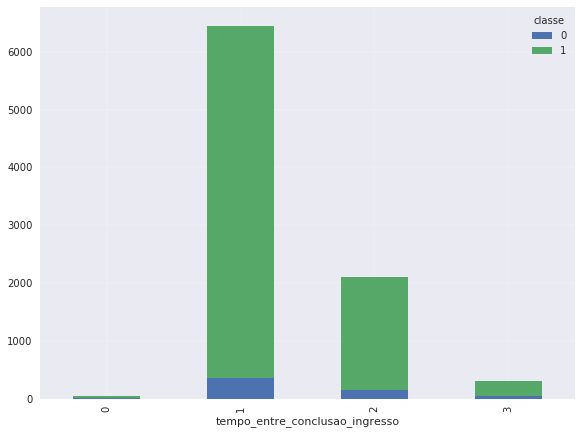

In [10]:
for index1 in dados.columns:
    #print(index1)
    if index1 in ['classe', 'id']:
        continue

    print(index1)
    print('-'*len(index1))        
        
    fig = plt.figure()
    #tabela de contigencia
    #tbl = pd.crosstab(index = dados[index1], columns = dados.classe, margins=True)
    tbl = pd.crosstab(index = dados[index1], columns = dados.classe)
    #print(tbl)

    #analise de correspondencia
    ca = prince.CA(tbl, n_components=-1)

    fig = plt.figure()
    fig, ax = ca.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)
    
    #ca.plot_cumulative_inertia()

    #matriz residual
    res = (ca.P - ca.expected_frequencies) * ca.N
    #res
       
    fig = plt.figure()
    sns.heatmap(res)
    
    fig = plt.figure()
    tbl.plot(kind="bar", stacked=True)    